# Studio di dati Covid ed inquinamento in Umbria:


## Pre-processing

### Preparazione dei dati

Come prima cosa è necessario caricare gli import che consentono di lavorare in Data Analysis. Subito dopo è stato creato un oggetto (DataFrame di pandas) per lavorare sul data set. Come ultimo passaggio è stato ritenuto opportuno mostrare i primi dati da trattare per avere una prima idea sulla composizione del dataset:

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns  
import sklearn 
import csv 


cvdata = pd.read_csv("dataset_exam.csv") 
cvdata.head()


Unnamed: 0         City        lat        lng  Population  Density  \
0           0  Acquasparta  42.691173  12.546451        4611     57.0   
1           1     Allerona  42.812033  11.973053        1722     21.0   
2           2      Alviano  42.588208  12.295936        1428     60.0   
3           3       Amelia  42.553528  12.416776       11852     89.0   
4           4       Arrone  42.583433  12.769865        2703     66.0   

   Surface  Depriv_idx  CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
0    81.61    1.013507                        6                             1   
1    82.61   -1.309272                        3                             1   
2    23.90   -2.148882                        2                             1   
3   132.50   -0.832084                        5                             1   
4    41.04   -0.479919                        7                             1   

   ...  mean_pm10_ug/m3_std_2019  mean_pm10_ug/m3_median_2019  \
0  ...                  7.288500                    14.674647   
1  ...                  7.038712                    14.752206   
2  ...                  8.908002                    19.626043   
3  ...                  7.749981                    16.706606   
4  ...                  7.416702                    12.388708   

   max_pm10_ug/m3_median_2019  max_pm10_ug/m3_mean_2019  \
0                   27.591324                 31.958118   
1                   26.312595                 30.565736   
2                   30.008255                 34.685780   
3                   31.103338                 36.154165   
4                   26.191957                 32.194737   

   max_pm10_ug/m3_std_2019  min_pm10_ug/m3_median_2019  \
0                15.960667                    6.754477   
1                18.320679                    4.790663   
2                17.674601                    8.948166   
3                19.364122                    7.095291   
4                20.364874                    3.970692   

   min_pm10_ug/m3_mean_2019  min_pm10_ug/m3_std_2019                 Zone  \
0                  7.535171                 4.595696  collinare e montana   
1                  5.623008                 3.754214  collinare e montana   
2                  9.722944                 5.046609  collinare e montana   
3                  7.938031                 4.636137  collinare e montana   
4                  4.888365                 4.001205  collinare e montana   

   Region  
0  Umbria  
1  Umbria  
2  Umbria  
3  Umbria  
4  Umbria  

[5 rows x 37 columns]

Per la fase di Pre-processing (preparazione dei dati) è necessario studiare il dataframe per al fine di determinare se ci siano o meno features da eliminare per i seguenti motivi:
- Mancanza di dati (valori nulli in alcune colonne);
- Mancanza di pertinenza ai fini dell'analisi o ridondanza di informazioni;

Logicamente è stato scelto di proseguire dall'ultima condizione per poi risalire alla prima: è infatti possibile rilevare una mancanza di dati anche nelle colonne non rilevanti per quanto concerne la nosta analisi. 

Risulta facile l'eliminazione repentina di due features: 
- Nome della regione: lo studio è circoscritto a comuni umbri.
- Indici: non è necessaria una colonna contenente gli indici in quanto un oggetto di tipo dataframe indicizza autonomamente le righe del data set.

In [2]:
# Il comando 'drop' consente:
# Eliminare un'intera colonna e di conseguenza rigettare l'informazione che essa potrebbe fornire ad altre righe;
#  Eliminare un'intera riga e di conseguenza rigettare tutti i dati che essa conteneva.

cvdata = cvdata.drop(columns='Region', axis=1)
cvdata= cvdata.drop(columns='Unnamed: 0', axis=1)

cvdata.head()


City        lat        lng  Population  Density  Surface  \
0  Acquasparta  42.691173  12.546451        4611     57.0    81.61   
1     Allerona  42.812033  11.973053        1722     21.0    82.61   
2      Alviano  42.588208  12.295936        1428     60.0    23.90   
3       Amelia  42.553528  12.416776       11852     89.0   132.50   
4       Arrone  42.583433  12.769865        2703     66.0    41.04   

   Depriv_idx  CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
0    1.013507                        6                             1   
1   -1.309272                        3                             1   
2   -2.148882                        2                             1   
3   -0.832084                        5                             1   
4   -0.479919                        7                             1   

   AvgHospitalized_jan_jun_2020  ...  mean_pm10_ug/m3_mean_2019  \
0                      0.273585  ...                  16.258196   
1                      0.336735  ...                  15.874484   
2                      0.252632  ...                  20.957803   
3                      0.317308  ...                  17.890738   
4                      0.475728  ...                  14.221094   

   mean_pm10_ug/m3_std_2019  mean_pm10_ug/m3_median_2019  \
0                  7.288500                    14.674647   
1                  7.038712                    14.752206   
2                  8.908002                    19.626043   
3                  7.749981                    16.706606   
4                  7.416702                    12.388708   

   max_pm10_ug/m3_median_2019  max_pm10_ug/m3_mean_2019  \
0                   27.591324                 31.958118   
1                   26.312595                 30.565736   
2                   30.008255                 34.685780   
3                   31.103338                 36.154165   
4                   26.191957                 32.194737   

   max_pm10_ug/m3_std_2019  min_pm10_ug/m3_median_2019  \
0                15.960667                    6.754477   
1                18.320679                    4.790663   
2                17.674601                    8.948166   
3                19.364122                    7.095291   
4                20.364874                    3.970692   

   min_pm10_ug/m3_mean_2019  min_pm10_ug/m3_std_2019                 Zone  
0                  7.535171                 4.595696  collinare e montana  
1                  5.623008                 3.754214  collinare e montana  
2                  9.722944                 5.046609  collinare e montana  
3                  7.938031                 4.636137  collinare e montana  
4                  4.888365                 4.001205  collinare e montana  

[5 rows x 35 columns]

Uno studio più approfondito del dataframe porta in evidenza come 3 delle features abbiano un nome identico ad altre con un suffisso ".1".

Questo fa trasparire una possibile ridondanza di informazioni dovute a queste colonne, rendendo necessario un esame più approfondito grazie ad un particolare tool in grado di eseguire tutte le combinazioni possibili iterativamente.

Se le features riportano gli stessi dati allora c'è la conferma di presenza di informazioni già conosciute. 
Implica un rigetto di queste colonne.



In [3]:
import itertools

# Lista di colonne duplicate
cols_to_drop = []

# Itera su tutte le combinazioni di 2 colonne del DataFrame
for col1, col2 in itertools.combinations(cvdata.columns, 2):
    if cvdata[col1].equals(cvdata[col2]):  
        print(f"Le colonne {col1} e {col2} sono identiche.")
        cols_to_drop.append(col2)

# Elimina le colonne duplicate 
cvdata_cleaned = cvdata.drop(columns=set(cols_to_drop))  # Usiamo `set` per evitare duplicati

cvdata_cleaned.head()


Le colonne mean_pm10_ug/m3_mean_jan_jun_2020 e mean_pm10_ug/m3_mean_jan_jun_2020.1 sono identiche.
Le colonne mean_pm10_ug/m3_std_jan_jun_2020 e mean_pm10_ug/m3_std_jan_jun_2020.1 sono identiche.
Le colonne mean_pm10_ug/m3_median_jan_jun_2020 e mean_pm10_ug/m3_median_jan_jun_2020.1 sono identiche.


City        lat        lng  Population  Density  Surface  \
0  Acquasparta  42.691173  12.546451        4611     57.0    81.61   
1     Allerona  42.812033  11.973053        1722     21.0    82.61   
2      Alviano  42.588208  12.295936        1428     60.0    23.90   
3       Amelia  42.553528  12.416776       11852     89.0   132.50   
4       Arrone  42.583433  12.769865        2703     66.0    41.04   

   Depriv_idx  CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
0    1.013507                        6                             1   
1   -1.309272                        3                             1   
2   -2.148882                        2                             1   
3   -0.832084                        5                             1   
4   -0.479919                        7                             1   

   AvgHospitalized_jan_jun_2020  ...  mean_pm10_ug/m3_mean_2019  \
0                      0.273585  ...                  16.258196   
1                      0.336735  ...                  15.874484   
2                      0.252632  ...                  20.957803   
3                      0.317308  ...                  17.890738   
4                      0.475728  ...                  14.221094   

   mean_pm10_ug/m3_std_2019  mean_pm10_ug/m3_median_2019  \
0                  7.288500                    14.674647   
1                  7.038712                    14.752206   
2                  8.908002                    19.626043   
3                  7.749981                    16.706606   
4                  7.416702                    12.388708   

   max_pm10_ug/m3_median_2019  max_pm10_ug/m3_mean_2019  \
0                   27.591324                 31.958118   
1                   26.312595                 30.565736   
2                   30.008255                 34.685780   
3                   31.103338                 36.154165   
4                   26.191957                 32.194737   

   max_pm10_ug/m3_std_2019  min_pm10_ug/m3_median_2019  \
0                15.960667                    6.754477   
1                18.320679                    4.790663   
2                17.674601                    8.948166   
3                19.364122                    7.095291   
4                20.364874                    3.970692   

   min_pm10_ug/m3_mean_2019  min_pm10_ug/m3_std_2019                 Zone  
0                  7.535171                 4.595696  collinare e montana  
1                  5.623008                 3.754214  collinare e montana  
2                  9.722944                 5.046609  collinare e montana  
3                  7.938031                 4.636137  collinare e montana  
4                  4.888365                 4.001205  collinare e montana  

[5 rows x 32 columns]

1. Itertools.combinations(cvdata.columns, 2) genera tutte le coppie di colonne senza ripetizioni;
2. Il ciclo for confronta ogni coppia;
3. Se due colonne sono uguali, una viene aggiunta alla lista cols_to_drop;
4. Alla fine, .drop(columns=set(cols_to_drop)) elimina le colonne duplicate.

Ora come ultimo passaggio della preparazione dati è necessario andare a verificare la presenza corretta di tutti i dati e, di conseguenza, l'assenza "NaN".

Registriamo il numero di "NaN" (metodo "isnull") e la loro posizione come segue:

In [4]:
nan_val= cvdata_cleaned.isnull().sum()
n_nan = nan_val.sum()
print("Numero di valori nulli: ", n_nan)

if nan_val.any():  # Verifica se ci sono NaN in qualsiasi colonna
    pos_nan_val = nan_val[nan_val > 0]
    print("Posizione dei valori nulli: ", pos_nan_val.index.tolist()) # Lista delle colonne con NaN

Numero di valori nulli:  1
Posizione dei valori nulli:  ['min_pm10_ug/m3_std_2019']


I risultati della ricerca mostrano che è stato trovato un dato mancante nella colonna riportante dati di inquinamento nel 2019.
Lo studio in questione è ambientato in un intervallo temporale che va dal gennaio 2020 al giugno 2020. Al fine di raggiungere quindi lo scopo del progetto che concerne questi dati (relazione tra epidemiologia del Covid-19 e inquinamento da polveri sottili/dati demografici), si è deciso di cancellare tutta la colonna (in questo caso in maniera mirata).

Nonostante la conscia perdita di informazioni che ne deriva si è valutata la scelta più coerente essendo comunque provvisti di informazioni sull'inquinamento dell'anno 2020.
La scelta possibile era infatti:
- Eliminare un'intera colonna: cancellando di conseguenza le informazioni presenti nelle altre righe;
- Eliminare un'intera riga: cancellando di conseguenza le informazioni presenti in essa (comunque valutate più pertineti ai fini dell'indagine).

In [5]:
cvdata_cleaned = cvdata_cleaned.drop('min_pm10_ug/m3_std_2019', axis=1)
cvdata_cleaned.head()

City        lat        lng  Population  Density  Surface  \
0  Acquasparta  42.691173  12.546451        4611     57.0    81.61   
1     Allerona  42.812033  11.973053        1722     21.0    82.61   
2      Alviano  42.588208  12.295936        1428     60.0    23.90   
3       Amelia  42.553528  12.416776       11852     89.0   132.50   
4       Arrone  42.583433  12.769865        2703     66.0    41.04   

   Depriv_idx  CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
0    1.013507                        6                             1   
1   -1.309272                        3                             1   
2   -2.148882                        2                             1   
3   -0.832084                        5                             1   
4   -0.479919                        7                             1   

   AvgHospitalized_jan_jun_2020  ...  min_pm10_ug/m3_median_jan_jun_2020  \
0                      0.273585  ...                            5.875184   
1                      0.336735  ...                            4.329871   
2                      0.252632  ...                            8.142606   
3                      0.317308  ...                            6.741657   
4                      0.475728  ...                            3.460392   

   mean_pm10_ug/m3_mean_2019  mean_pm10_ug/m3_std_2019  \
0                  16.258196                  7.288500   
1                  15.874484                  7.038712   
2                  20.957803                  8.908002   
3                  17.890738                  7.749981   
4                  14.221094                  7.416702   

   mean_pm10_ug/m3_median_2019  max_pm10_ug/m3_median_2019  \
0                    14.674647                   27.591324   
1                    14.752206                   26.312595   
2                    19.626043                   30.008255   
3                    16.706606                   31.103338   
4                    12.388708                   26.191957   

   max_pm10_ug/m3_mean_2019  max_pm10_ug/m3_std_2019  \
0                 31.958118                15.960667   
1                 30.565736                18.320679   
2                 34.685780                17.674601   
3                 36.154165                19.364122   
4                 32.194737                20.364874   

   min_pm10_ug/m3_median_2019  min_pm10_ug/m3_mean_2019                 Zone  
0                    6.754477                  7.535171  collinare e montana  
1                    4.790663                  5.623008  collinare e montana  
2                    8.948166                  9.722944  collinare e montana  
3                    7.095291                  7.938031  collinare e montana  
4                    3.970692                  4.888365  collinare e montana  

[5 rows x 31 columns]

#### Correzione cordinate
Durante lo svolgimento che vedremo più in avanti delle mappe, si è notato un errore sul dato relativo alle coordinate nel comune di Giove. Tramite una breve ricerca su internet le si è sostituite come segue:

In [6]:
indiceg = cvdata_cleaned.index[cvdata_cleaned['City'] == 'Giove'].tolist() # Trova l'indice della riga con City = 'Giove'
cvdata_cleaned.loc[indiceg[0], "lat"] = 42.5103083 # Sostituisce il valore di latitudine
cvdata_cleaned.loc[indiceg[0], "lng"] = 12.3315972

### Plots

In questa ultima parte del pre-processing dei dati si sono, in primo luogo, creati 2 grafici che mettono in relazione:
- Demografia;
- Epidemiologia;
- Geografia del territorio.

Al fine di trattare informazioni epidemiologiche è necessario normalizzare alcuni dati. Trattandosi dei dati della pandemia si è pensato di normalizzare utilizzando il tasso di incidenza covid per abitante. Di conseguenza t.c. $(variabile epidemiologica/Popolazione)*1000$.
Questo permettere di rendere il dato demografico legato prettamente alla densità abitativa dei vari comuni, alleggerendo il grafico.
Inoltre, è stato ritenuto opportuno mantenere una copia del dataframe non normalizzata in caso fosse utile in considerazioni successive.

Non solo, con la funzione MinMaxScaler(): che permette di normalizzare a 1 i valori dati prendendo 1 come il masssimo e 0 come il minimo, è stato considerato opportuno andare a normalizzare tutti i dati relativi all'inquinamento essendo per molti casi estremamente simili tra loro.
Si è scelto di lavorare con "mean_pm10_ug/m3_mean_jan_jun_2020" (Valore medio espresso in μg/m3 della media giornaliera di pm10 (polveri sottili) rilevato nel periodo gen-giu 2020) in quanto valutato la misurazione che potrebbe influenzare in maniera più determinante l'inquinamento nel periodo della misurazione.


In [7]:

from sklearn.preprocessing import MinMaxScaler
cvdata_cleaned_nn = cvdata_cleaned.copy() # Copia del DataFrame

#  Colonne contenenti info epidemiologiche (7-12) e calcolato il tasso per 1000 abitanti
colonne_epidemiologiche = cvdata_cleaned.columns[7:13] 

for col in colonne_epidemiologiche:
    cvdata_cleaned[col] = ((cvdata_cleaned[col] / cvdata_cleaned['Population']) * 1000)  # Sovrascrive i valori nelle colonne originali

colonne_inq = cvdata_cleaned.columns[13:30]

# Ulteriore normalizzazione dei dati relativi l'inquinamento
# Normalizza ogni colonna individualmente
scaler = MinMaxScaler()
for col in colonne_inq:
    cvdata_cleaned[col] = scaler.fit_transform(cvdata_cleaned[[col]])  # Doppie parentesi per mantenere il DataFrame

cvdata_cleaned.head()



City        lat        lng  Population  Density  Surface  \
0  Acquasparta  42.691173  12.546451        4611     57.0    81.61   
1     Allerona  42.812033  11.973053        1722     21.0    82.61   
2      Alviano  42.588208  12.295936        1428     60.0    23.90   
3       Amelia  42.553528  12.416776       11852     89.0   132.50   
4       Arrone  42.583433  12.769865        2703     66.0    41.04   

   Depriv_idx  CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
0    1.013507                 1.301236                      0.216873   
1   -1.309272                 1.742160                      0.580720   
2   -2.148882                 1.400560                      0.700280   
3   -0.832084                 0.421870                      0.084374   
4   -0.479919                 2.589715                      0.369959   

   AvgHospitalized_jan_jun_2020  ...  min_pm10_ug/m3_median_jan_jun_2020  \
0                      0.059333  ...                            0.433291   
1                      0.195549  ...                            0.262766   
2                      0.176913  ...                            0.683500   
3                      0.026773  ...                            0.528906   
4                      0.176000  ...                            0.166819   

   mean_pm10_ug/m3_mean_2019  mean_pm10_ug/m3_std_2019  \
0                   0.474132                  0.127640   
1                   0.441134                  0.036301   
2                   0.878277                  0.719832   
3                   0.614523                  0.296386   
4                   0.298950                  0.174518   

   mean_pm10_ug/m3_median_2019  max_pm10_ug/m3_median_2019  \
0                     0.492131                    0.342349   
1                     0.498647                    0.303011   
2                     0.908141                    0.416703   
3                     0.662854                    0.450392   
4                     0.300069                    0.299299   

   max_pm10_ug/m3_mean_2019  max_pm10_ug/m3_std_2019  \
0                  0.315504                 0.183207   
1                  0.276595                 0.280433   
2                  0.391727                 0.253816   
3                  0.432760                 0.323420   
4                  0.322116                 0.364649   

   min_pm10_ug/m3_median_2019  min_pm10_ug/m3_mean_2019                 Zone  
0                    0.474027                  0.456042  collinare e montana  
1                    0.275532                  0.255519  collinare e montana  
2                    0.695757                  0.685467  collinare e montana  
3                    0.508475                  0.498289  collinare e montana  
4                    0.192653                  0.178480  collinare e montana  

[5 rows x 31 columns]

Ora che i dati relativi all'epidemiologia sono stati normalizzati sulla popolazione per 1000 abitanti e quelli dell'inquinamento a 1, è possibile andare a creare il primo grafico che mette in relazione le variabili richieste.
A tale scopo è stato selezionato uno Scatter Plot (Grafico di dispersione); in particolare:
- Si è cercata una relazione tra i casi covid e la densità abitativa;
- Sul terzo asse (colore) è stata posta la feature a primo impatto più rilevante nel quadro dell'inquinamento;
- Il tooltip consente di visualizzare anche il dato sul benessere dei cittadini (deprivation index).


In [8]:
import plotly.express as px

# Crea il grafico a dispersione con Plotly

# inizializza un'istanza fig dell'oggetto Figure della libreria plotly di un grafico con la funzione px.scatter
fig = px.scatter(
    cvdata_cleaned, 
    x="Density", 
    y="CovidCases_jan_jun_2020", 
    color="mean_pm10_ug/m3_mean_jan_jun_2020",
    symbol="Zone",
    color_continuous_scale="plasma",  # Palette dei colori
    custom_data=["City", "CovidCases_jan_jun_2020", "mean_pm10_ug/m3_mean_jan_jun_2020", "Depriv_idx"]
)

# Personalizzazione asse e titolo con il metodo update_layout dell'oggetto Figure
fig.update_layout(
    title="Density vs Covid Incidence",
    xaxis_title="Density",
    yaxis_title="Covid Cases Per 1000 Inhabitants",
    coloraxis_colorbar_title="mean_pm10 (Normalized)",  # Titolo colorbar
    legend_title="Zone",  # Titolo per i simboli
    legend=dict(
        yanchor="bottom",
        y=1.05,
        xanchor="right",
        x=1.5
    )
)

fig.update_traces(
    hovertemplate=
    "City: %{customdata[0]}<br>" +
    "Covid Cases: %{customdata[1]}<br>" +
    "PM10: %{customdata[2]:.2f}<br>" +
    "Deprivation Index: %{customdata[3]:.2f}<br>" 
)

fig.show()


Riassumendo, nel grafico precedente sono state mostrate relazioni tra demografia, geografia e dati epidemiologici.

Ora, come richiesto, verrà generato un altro grafico da cui seguiranno ulteriori considerazioni:

In [9]:
# Creare il grafico a dispersione con Plotly.express 
fig = px.scatter(
    cvdata_cleaned, 
    x="Density", 
    y="Depriv_idx", 
    color="CovidCases_jan_jun_2020",
    symbol="Zone",
    color_continuous_scale="plasma",
    custom_data=["City", "CovidCases_jan_jun_2020", "mean_pm10_ug/m3_mean_jan_jun_2020", "Depriv_idx"]
)

# Personalizzazione asse e titolo
fig.update_layout(
    title="Density vs Deprivation index",
    xaxis_title="Density",
    yaxis_title="Deprivation index",
    coloraxis_colorbar_title="CovidCases_jan_jun_2020",  # Titolo colorbar
    legend_title="Zone",  # Titolo per i simboli
    legend=dict(
        yanchor="bottom",
        y=1.05,
        xanchor="right",
        x=1.5
    )
)

# Personalizzazione del template per il tooltip
fig.update_traces(
    hovertemplate=
    "City: %{customdata[0]}<br>" +
    "Covid Cases: %{customdata[1]}<br>" +
    "PM10: %{customdata[2]:.2f}<br>" +
    "Deprivation Index: %{customdata[3]:.2f}<br>" 
)

fig.show()


In questo grafico si mostra il Deprivation Index in funzione della densità, mentre il terzo asse mostra i casi covid. 
Il risultato ottenuto non mostra a primo impatto alcun legame tra l'indice di povertà e la densità abitativa ma nemmeno con la pandemia.

Si pensa che in passato questo indice abbia avuto una forte correlazione con le epidemie generali in quanto lo stato socia dei cittadini e le loro abitudini quotidiane erano estremamente diverse; per fortuna la situazione, per quanto disastrosa, non ha sottolineato disuguaglianze sociali in funzione dei casi covid.

Si è sentito il dovere di sottolineare perché è stato scelto di "plottare" il depriv index in funzione della densità e non dei casi covid, con la speranza di non notare una linearità tra questo e le evoluzioni della pandemia si è indagato una possibile relazione tra il benessere dei cittadini e la densità abitativa, anche in quest'ultimo caso, però, fallendo.


#### Nota:
Nel numero di casi normalizzato a 1000 abitanti alcuni dei dati sembrano essere soggetti delle situazioni "estreme" che hanno portato ad un aumento piuttosto elevato della percentuale (Giove, Porano, Castel Giorgio), rispetto agli altri comuni umbri.
Questo potrebbe essere dato probabilmente da dei focolai epidemiologici scoppiati in ambienti socialmente attivi anche durante la pandemia. Grazie una breve ricerca internet si è notato che i candidati non erano molti:
- Ospedali
- Case di riposo e RSA
- Ambulatori e studi medici
- Magazzini e fabbriche che non hanno potuto fermarsi durante il lockdown
- Stazioni ferroviarie
- Aeroporti
- Feste private.

Considerando i 3 comuni con i valori più alti si nota che si tratta di comuni in cui sono totalmente assenti fabbriche, stazioni ferroviarie e areoporti, ma anche ospedali.
Questo porta alla conclusione che i focolai (se non in feste private, evento tremendamente imprevedibile e aleatorio) dovrebbero essere date da case di riposo/RSA.
Non essendo presente il dato sull'anzianità dei comuni italiani si è pensato di plottare la percentuale di ricoveri e delle morti normalizzate in funzione dei casi covid normalizzati.

In [10]:
cvdata_cleaned_copy = cvdata_cleaned.copy()  # Copia del DataFrame normalizzato e pulito
# Crea una nuova colonna booleana che distingue tra zero decessi e uno o più decessi
cvdata_cleaned['ZeroDeceased'] = cvdata_cleaned['Deceased_jan_jun_2020'] == 0

# Crea il grafico a dispersione con Plotly
fig = px.scatter(
    cvdata_cleaned, 
    x="CovidCases_jan_jun_2020", 
    y="MaxIntensiveCare_jan_jun_2020", 
    color="Deceased_jan_jun_2020",  # Colore basato sui decessi
    symbol="ZeroDeceased",  # Utilizzare la nuova variabile ZeroDeceased per i simboli
    size="Density",  # La dimensione continua in base alla densità
    color_continuous_scale="plasma",  # Palette dei colori
    custom_data=["City", "CovidCases_jan_jun_2020", "MaxIntensiveCare_jan_jun_2020", "Deceased_jan_jun_2020", "Depriv_idx"]
)

# Personalizzazione asse e titolo
fig.update_layout(
    title="Covid Indices vs Max of Intensive Care",
    xaxis_title="Covid cases per 1000 Inhabitants",
    yaxis_title="Max Intensive Care per 1000 Inhabitants",
    coloraxis_colorbar_title="Deceased_jan_jun_2020",  # Titolo colorbar
    legend_title="Zero vs One or more deaths",  # Titolo per la legenda
    legend=dict(
        yanchor="bottom",
        y=1.05,
        xanchor="right",
        x=1.5
    ),
) 

# Personalizzazione del template per il tooltip
fig.update_traces(
    hovertemplate=
    "City: %{customdata[0]}<br>" +
    "Covid Cases: %{customdata[1]}<br>" +
    "Max intensive care per 1000 inhabitants: %{customdata[2]:.2f}<br>" +
    "Deceased per 1000 inhabitants:  %{customdata[3]:.2f}<br>" +
    "Deprivation Index: %{customdata[4]:.2f}<br>",
)
# Personalizzare i nomi nella legenda
fig.for_each_trace(
    lambda t: t.update(name='0 Death' if t.name == 'True' else '1 or more Death')  # Modifica il nome nella legenda
)

fig.show()

Sembra effettivamente esserci una correlazione tra il picco delle terapie intensive e il numero di casi Covid normalizzati per 1000 abitanti.
Questo suggerisce che le percentuali più elevate di ricoveri in terapia intensiva, in funzione dei casi Covid, si registrano a Porano e Giove. Riflettendo su questi dati, non è irragionevole ipotizzare che i principali focolai siano strutture per anziani, i cui ospiti, essendo più vulnerabili, hanno una probabilità maggiore di necessitare della terapia intensiva.
Anche la scala cromatica conferma, purtroppo, il più alto valore di morti per 1000 persone dovuti alla pandemia.

Castel Giorgio, invece, sembra non validare l'ipotesi.
In una nota in fondo al progetto, e durante l'esecuzione, verranno comunque forniti maggiori dettagli a riguardo.

I dati possono risultare un po' confusi nella zona più vicina all'origine ma non è stato considerato necessario cambiare scala in quanto è presente la possibilità di zoommare.

### Plot (Extra):
 Ora si crea un grafico in cui sono presenti densità e popolazione sugli assi principali, con il toolpit nel quale è presente solo il nome della città e la terza features (colore) è selezionabile.

 A tale scopo, si definisce una variabile del widget (a tendina) utilizzando la classe Dropdown. Infine si usa la classe interactive passando due argomenti:
 1. una funzione (come crea_grafico()) 
 2. una variabile del widget della classe dropdown.

In [11]:
import ipywidgets as widgets

# Nell'ultimo passaggio è stato necessario aggiungere una colonna per verificare se ci fossero o no dei decessi, qui viene semplicemente eliminata x tornare al DataFrame di partenza =.drop.columns[-1], axis=1)
cvdata_cleaned =cvdata_cleaned.drop(cvdata_cleaned.columns[-1], axis=1)
# Ottenere tutte le colonne del DataFrame come opzioni per il widget
features = cvdata_cleaned.columns.tolist()
variabili_colore = features[6:]


# Funzione per creare il grafico in base alla variabile selezionata dall'utente
def crea_grafico(variabile_colore):
    fig = px.scatter(
        cvdata_cleaned, 
        x="Density",  
        y="Population",
        color=variabile_colore,  # Variabile per il colore
        color_continuous_scale="plasma",  # Palette dei colori
        custom_data=["City"] # Customizzazione del tooltip
    )

    # Personalizzazione asse e titolo
    fig.update_layout(
        title="Plot di Densità e Popolazione con variabile selezionata",
        xaxis_title="Log (Density)",
        yaxis_title="Log (Population)",
        coloraxis_colorbar_title=variabile_colore,  # Titolo colorbar
        xaxis_type="log",  # Imposta la scala logaritmica sull'asse X
        yaxis_type="log"   # Imposta la scala logaritmica sull'asse Y
    )

    # Personalizzazione del tooltip
    fig.update_traces(
        hovertemplate=
        "City: %{customdata[0]}<br>" 
    )

    fig.show()

# Creare il widget per selezionare la variabile (Dropdown=menù a tendina)
variabile_widget = widgets.Dropdown(
    options=variabili_colore,
    value="CovidCases_jan_jun_2020",  # Valore predefinito
    description='Color:',
    disabled=False
)

# Creare il widget interattivo
widgets.interactive(crea_grafico, variabile_colore=variabile_widget)



interactive(children=(Dropdown(description='Color:', index=1, options=('Depriv_idx', 'CovidCases_jan_jun_2020'…

N.B: In un primo passo è stato plottato un grafico della densità e popolazione, poi però si è notato che i dati demografici (valori diversi da zero) era possibile plottarli su scala logaritmica e il risultato è stato riportato in quanto più facilmente interpretabile.

### Correlazione:

Al fine dello studio di correlazione tra le feature, il metodo più adatto è la costruzione di una matrice di correlazione. Questa, essendo una matrice f × f (con f pari al numero di feature), permette di confrontare direttamente due variabili. I valori della matrice appartengono all'intervallo [-1,1], dove:
- +1 indica una correlazione lineare perfetta;
- -1 indica una perfetta anti-correlazione lineare;
- 0 indica assenza di correlazione lineare.

Sorge però un problema con le variabili qualitative non essendo possibile correlarle in maniera diretta con le variabili numeriche. Per la colonna contenente i nomi delle città, la soluzione è immediata: è sufficiente escluderla, poiché non ha senso, banalmente, cercare una correlazione tra i nomi delle città e il numero di casi covid/inquinamento. Mentre, la variabile Zona, richiede valutazioni aggiuntive.

Non potendo stabilire a priori una relazione numerica (fornire un dato quantitativo) tra le diverse zone e altre variabili, si è scelto di applicare il One-Hot Encoding.
Questo metodo trasforma una variabile categorica in più variabili binarie (fittizie, dummies): per ogni valore unico presente nella feature originale, viene creata una nuova colonna.
Ogni nuova colonna assume il valore 1 se, in quella riga, la feature Zona corrisponde alla categoria in questione, e 0 altrimenti.
In questo caso, dato che Zona ha 3 possibili valori, il One-Hot Encoding genera tre nuove colonne. Questo comporta un aumento del costo computazionale, ma, essendo limitato, è stato valutato accettabile.

In [12]:
cvdata_cleaned = cvdata_cleaned.drop(["City"], axis=1)
cvdata_cleaned = pd.get_dummies(cvdata_cleaned, columns=['Zone']) # Metodo getdummies per convertire le variabili categoriche in variabili binarie
colonne = cvdata_cleaned.columns.tolist()
print(colonne)

['lat', 'lng', 'Population', 'Density', 'Surface', 'Depriv_idx', 'CovidCases_jan_jun_2020', 'MaxHospitalized_jan_jun_2020', 'AvgHospitalized_jan_jun_2020', 'Deceased_jan_jun_2020', 'MaxIntensiveCare_jan_jun_2020', 'AvgIntensiveCare_jan_jun_2020', 'mean_pm10_ug/m3_mean_jan_jun_2020', 'mean_pm10_ug/m3_std_jan_jun_2020', 'mean_pm10_ug/m3_median_jan_jun_2020', 'max_pm10_ug/m3_mean_jan_jun_2020', 'max_pm10_ug/m3_std_jan_jun_2020', 'max_pm10_ug/m3_median_jan_jun_2020', 'min_pm10_ug/m3_mean_jan_jun_2020', 'min_pm10_ug/m3_std_jan_jun_2020', 'min_pm10_ug/m3_median_jan_jun_2020', 'mean_pm10_ug/m3_mean_2019', 'mean_pm10_ug/m3_std_2019', 'mean_pm10_ug/m3_median_2019', 'max_pm10_ug/m3_median_2019', 'max_pm10_ug/m3_mean_2019', 'max_pm10_ug/m3_std_2019', 'min_pm10_ug/m3_median_2019', 'min_pm10_ug/m3_mean_2019', 'Zone_collinare e montana', 'Zone_conca ternana', 'Zone_di valle']


Ora costruiamo la matrice di correlazione:

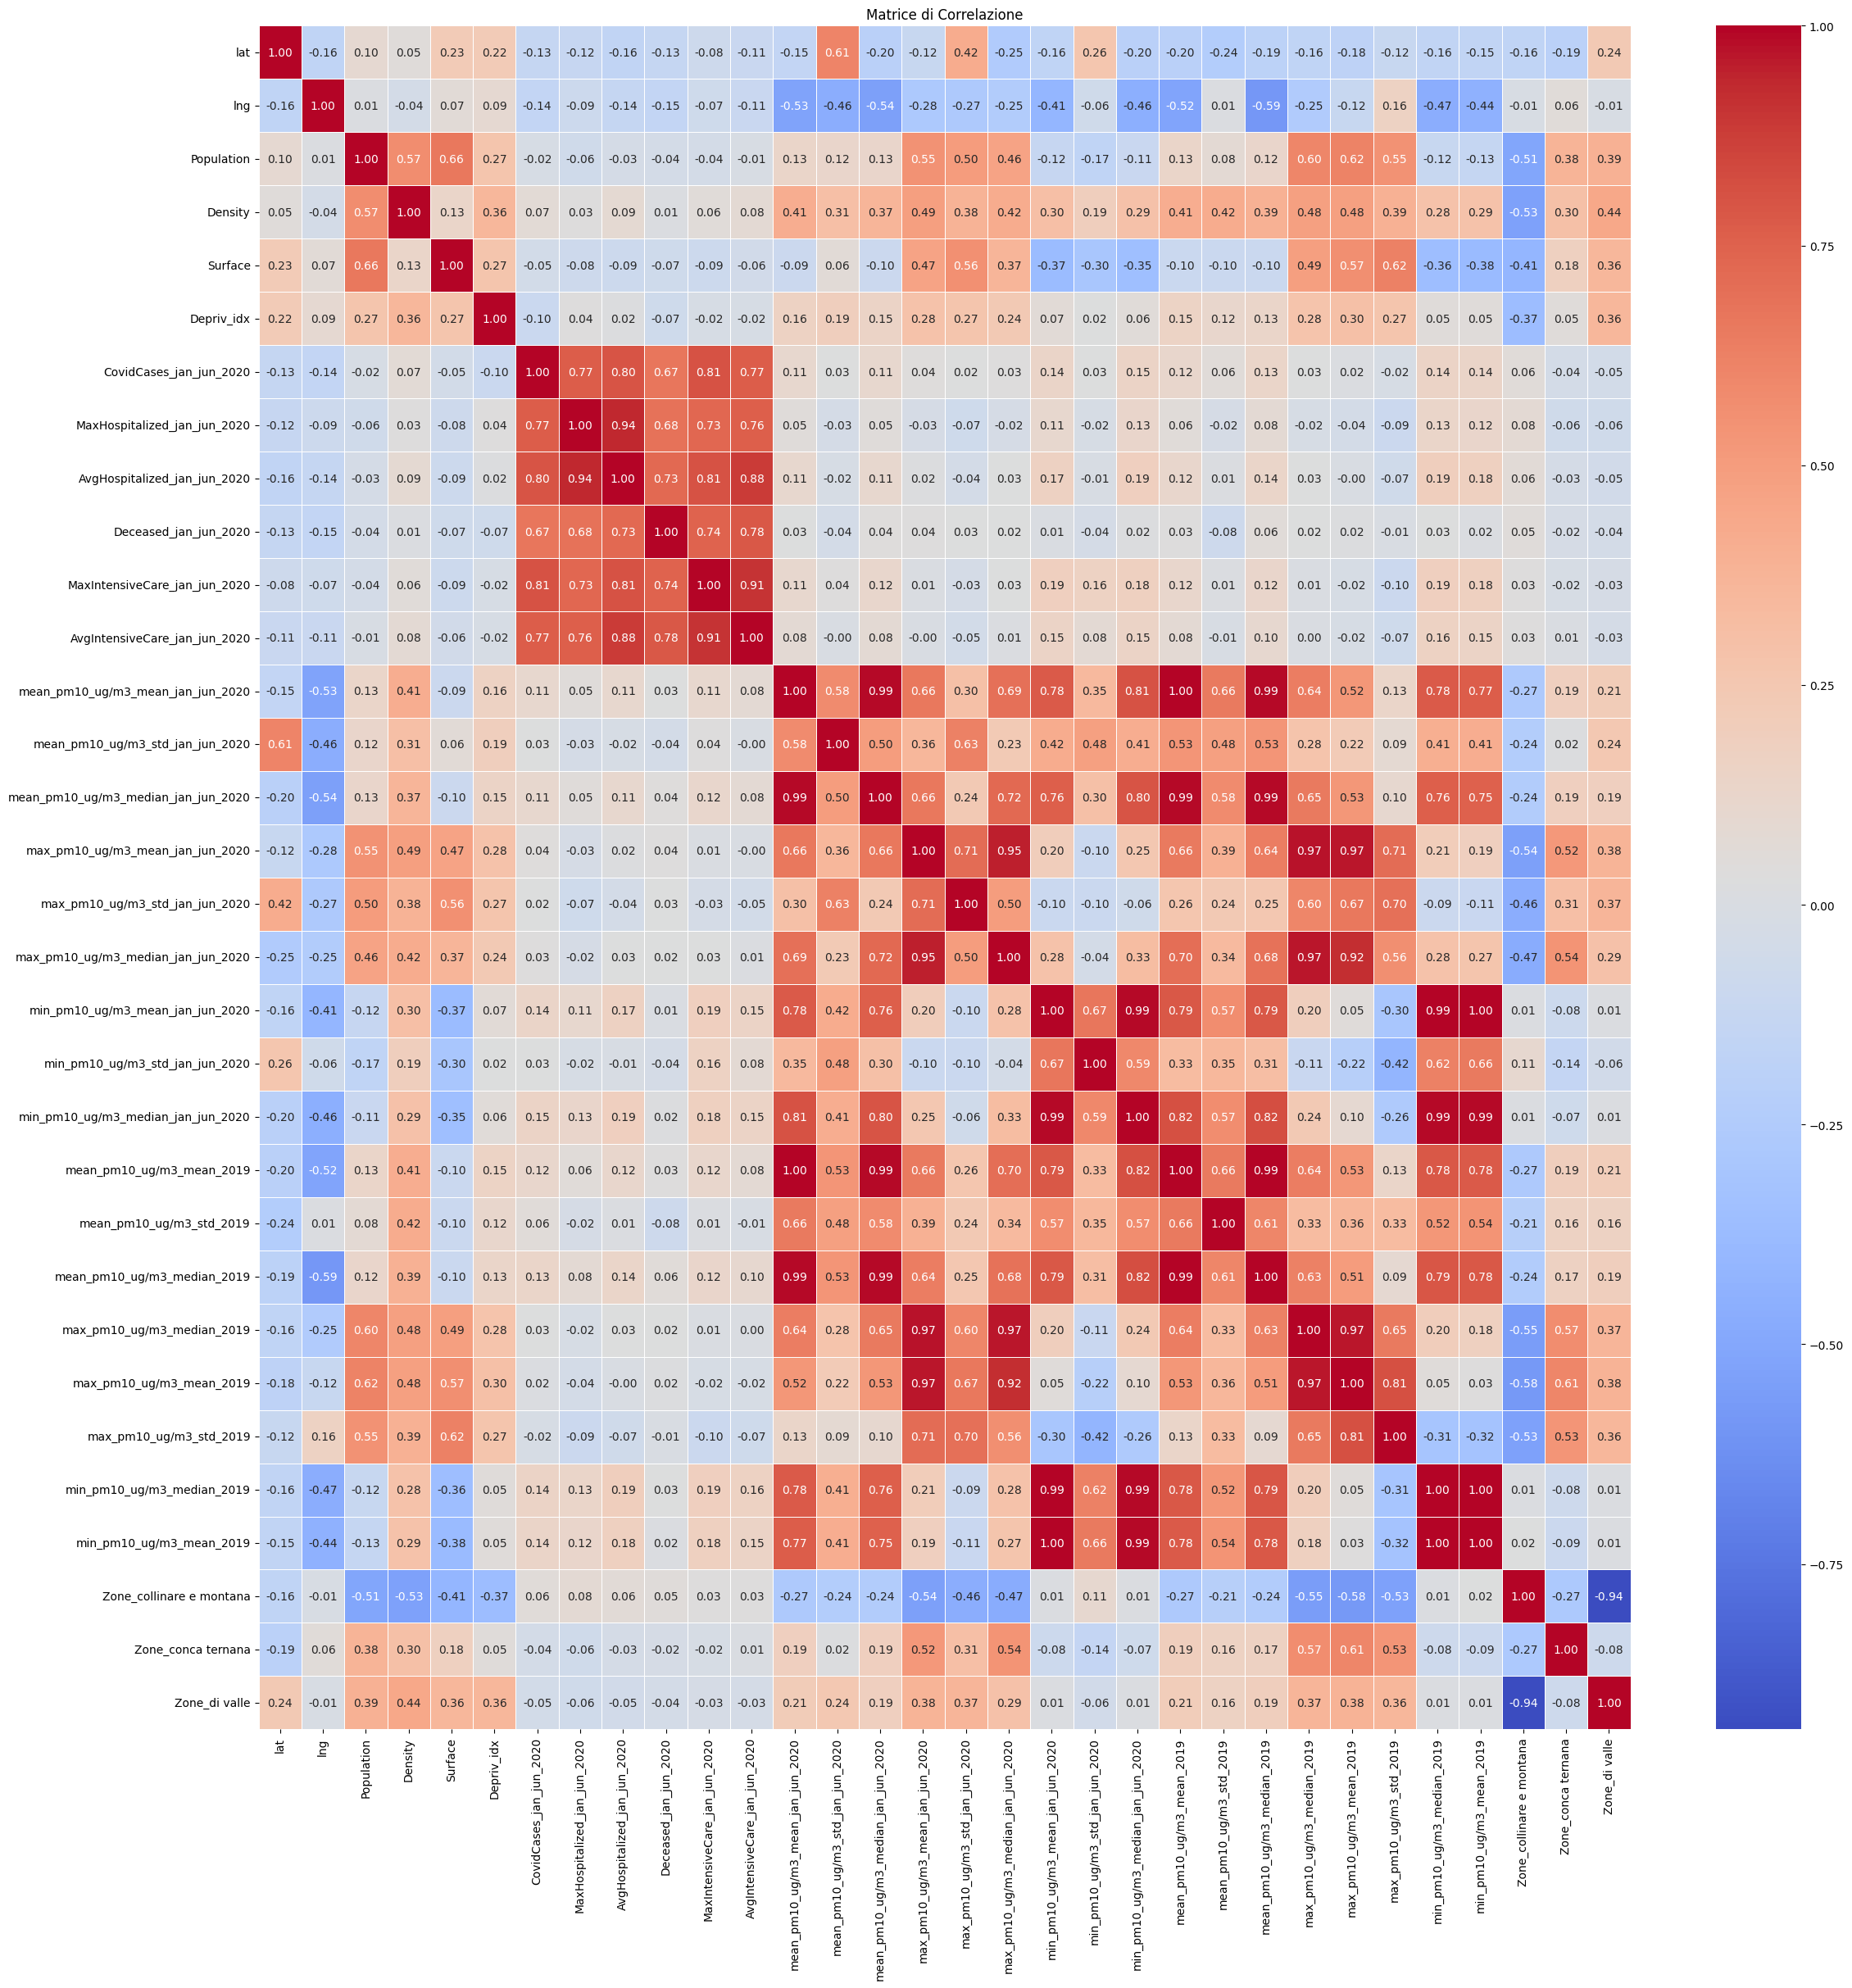

In [13]:
correlation_matrix = cvdata_cleaned.corr() # .corr() metodo della classe DataFrame di Pandas per calcolare la correlazione tra le colonne
plt.figure(figsize=(27, 27)) # Creare una figura (più grande)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) # Crea una heatmap con seaborn
plt.title("Matrice di Correlazione")
plt.show()

Come era prevedibile non è possibile trovare una correlazione tra i dati covid e l'inquinamento, infatti i valori della matrice per queste intersezioni sono tutti prossimi a zero (colori più tenui visivamente).

Si può però notare una correlazione (seppur minima) tra l'inquinamento e la zona di valle con impatto maggiore sulla conca ternana (forse dovuto alla maggior quantità di fabbriche presenti nel suolo della provincia). Al contrario, emerge una leggera correlazione negativa tra la zona collinare e montana e i dati relativi all'inquinamento.
Si può concludere che non scartare queste features (zone) ha comunque fornito delle informazioni utili.

I valori che risultano più correlati in questo caso riguardano proprio i dati di inquinamento confrontati a distanza di un anno. Questo potrebbe essere ininfluente ma dimostra chiaramente la validità e l'affidabilità del dataset.
Lo stesso vale anche per i dati epidemiologici che sono strettamenre correlati tra di loro.

### Mappa:


Prima di disegnare qualsiasi mappa è necessario capire la struttura del file trovato online "limits_R_10_municipalities.geojson":

In [14]:
import geopandas as gpd
import folium # Creazione mappe interattive

# Carichato il file GeoJSON e memorizzato in un GeoDataFrame (gdf)
gdf = gpd.read_file("limits_R_10_municipalities.geojson") 
gdf.columns # Visualizza le colonne del GeoDataFrame per capire com'è strutturato


Index(['name', 'op_id', 'minint_elettorale', 'minint_finloc', 'prov_name',
       'prov_istat_code', 'prov_istat_code_num', 'prov_acr', 'reg_name',
       'reg_istat_code', 'reg_istat_code_num', 'opdm_id', 'com_catasto_code',
       'com_istat_code', 'com_istat_code_num', 'geometry'],
      dtype='object')

In [15]:
for cit in gdf.iloc[:, 0]:  
    print(cit)

Assisi
Bastia Umbra
Bettona
Bevagna
Campello sul Clitunno
Cannara
Cascia
Castel Ritaldi
Castiglione del Lago
Cerreto di Spoleto
Citerna
Città della Pieve
Città di Castello
Collazzone
Corciano
Costacciaro
Deruta
Foligno
Fossato di Vico
Fratta Todina
Giano dell'Umbria
Gualdo Cattaneo
Gualdo Tadino
Gubbio
Lisciano Niccone
Magione
Marsciano
Massa Martana
Monte Castello di Vibio
Montefalco
Monteleone di Spoleto
Monte Santa Maria Tiberina
Montone
Nocera Umbra
Norcia
Paciano
Panicale
Passignano sul Trasimeno
Perugia
Piegaro
Pietralunga
Poggiodomo
Preci
San Giustino
Sant'Anatolia di Narco
Scheggia e Pascelupo
Scheggino
Sellano
Sigillo
Spello
Spoleto
Todi
Torgiano
Trevi
Tuoro sul Trasimeno
Umbertide
Valfabbrica
Vallo di Nera
Valtopina
Acquasparta
Allerona
Alviano
Amelia
Arrone
Attigliano
Baschi
Calvi dell'Umbria
Castel Giorgio
Castel Viscardo
Fabro
Ferentillo
Ficulle
Giove
Guardea
Lugnano in Teverina
Montecastrilli
Montecchio
Montefranco
Montegabbione
Monteleone d'Orvieto
Narni
Orvieto
Otricoli

Sono stati stampati i nomi dei comuni umbri per verificare se essi differiscano da quelli presenti nel dataframe fornito.
Dato che sono emerse discrepanze, è necessario formattarli allo stesso modo:

In [16]:
# Recupero del DataFrame pre correlation matrix
cvdata_cleaned = cvdata_cleaned_copy

cvdata_cleaned["City"]=cvdata_cleaned["City"].apply( # Applica una funzione su ogni elemento della colonna City
    lambda x: x.replace( # lambda prende l'elemento e lo assegna a x che poi passa al metodo replace
        "dell_","dell'"
    ).replace(
        "Citta","Città"
    ).replace(
        "Sant_","Sant'"
    ).replace(
        "d_","d'"
    ).replace(
        "_"," "
    )
)

# Verifica che sia avvenuto correttamente (ordina con sort_values i nomi e con reset_index si resetta l'indice ordinato)
cvdata_cleaned["City"].sort_values().reset_index(drop=True).equals(gdf["name"].sort_values().reset_index(drop=True))

True

Ora si è verificato che la prima colona è effettivamente la stessa della colonna nel dataframe di geopandas (gds) e di conseguenza il dataframe originario è stato modificato sovrascrivendo i dati della prima colonna (City).
(Nessun problema in quanto abbiamo comunque, sempre, la copia).

Si è valutato di mostrare 3 mappe e poi trarre le conclusioni qualitative relative. Le mappe, centrate su una coordinata abbastanza casuale dell'Umbria centrale (Collazzone, Provincia di Pg), mostrano colori diversi per:
- Densità;
- Inquinamento da polveri sottili;
- Casi covid. 

Per aggiungere un tooltip, è stato necessario includere features quali: 
- Density;
- CovidCases_jan_jun_2020;
- mean_pm10_ug/m3_mean_jan_jun_2020.

Con un ciclo for: iterando attraverso ciascuna features del file GeoJson, cercando il 'name'.
Una volta trovata la corrispondenza con la stringa presente in cvdata_cleaned, si aggiungono le variabili richieste.

In [17]:
# Crea la mappa centrata a Collazzone
mappa_d = folium.Map(location=[42.95, 12.45], zoom_start=8)  

# Crea il choropleth
choropleth = folium.Choropleth(
    geo_data=gdf,  # File con i confini geografici
    name="Choropleth",
    data=cvdata_cleaned,
    columns=['City', 'Density'],  # Colonne: Nome del comune + Dati da visualizzare
    key_on="feature.properties.name",  # Chiave per unire il dataset al GeoJSON (Associa i dati ai confini geografici basandosi sul nome del comune.)
    fill_color="YlOrBr", 
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Densità abitativa",
    highlight=True,
    smooth_factor=0.3
)

# Aggiunge il choropleth alla mappa
choropleth.add_to(mappa_d)

# Lista delle feature da mostrare nel tooltip
tooltip_features = ['City','Density', 'Population', 'Surface']  # Dati da mostrare nel tooltip

# Aggiunge i dati dal dataframe al GeoJSON
for f in choropleth.geojson.data['features']:
    # Troviamo il nome del comune (identificato nella chiave 'name')
    feature_name = f['properties']['name']
    
    # Trova i dati corrispondenti nel dataframe cvdata_cleaned usando 'name' al posto di 'City'
    city_data = cvdata_cleaned[cvdata_cleaned['City'] == feature_name] 
    
    if not city_data.empty: # Assicura che il codice venga eseguito solo se il comune è presente nel DataFrame
        # Aggiunge i dati al GeoJSON per il tooltip
        for tooltip in tooltip_features:
            f['properties'][tooltip] = str(city_data.iloc[0][tooltip])

# Oggetto di Folium che Aggiunge il GeoJsonTooltip alla mappa
folium.GeoJsonTooltip(fields=tooltip_features, aliases=['Città: ','Densità: ', 'Popolazione: ', 'Superficie: ']).add_to(choropleth.geojson)
mappa_d

In [18]:
# Creata la mappa centrata in Umbria
mappa_i = folium.Map(location=[42.95, 12.45], zoom_start=8)  

# Creato il choropleth
choropleth = folium.Choropleth(
    geo_data=gdf,  # File con i confini geografici
    name="Choropleth",
    data=cvdata_cleaned,
    columns=['City', 'mean_pm10_ug/m3_mean_jan_jun_2020'],  # Colonne: Nome del comune + Dati da visualizzare
    key_on="feature.properties.name",  # Chiave per unire il dataset al GeoJSON
    fill_color="YlOrBr", 
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Inquinamento da PM10",
    highlight=True,
    smooth_factor=0.3
)

# Aggiunto il choropleth alla mappa
choropleth.add_to(mappa_i)

# Creazione del tooltip con le informazioni 
tooltip_features = ['City' ,'Density', 'CovidCases_jan_jun_2020', 'mean_pm10_ug/m3_mean_jan_jun_2020']  # Dati da mostrare nel tooltip

# Aggiunge i dati dal dataframe al GeoJSON
for f in choropleth.geojson.data['features']:
    # Troviamo il nome del comune (identificato nella chiave 'name')
    feature_name = f['properties']['name']
    
    # Trova i dati corrispondenti nel dataframe cvdata_cleaned
    city_data = cvdata_cleaned[cvdata_cleaned['City'] == feature_name]
    
    if not city_data.empty:
        # Aggiunge i dati al GeoJSON 'properties' per ogni comune
        for tooltip in tooltip_features:
            value = city_data.iloc[0][tooltip]
            f['properties'][tooltip] = str(city_data.iloc[0][tooltip])

# Aggiunge il GeoJsonTooltip alla mappa, utilizzando i dati nelle proprietà
folium.GeoJsonTooltip(fields=tooltip_features, aliases= ['Città: ', 'Densità: ', 'Casi covid per 1000 abitanti: ', 'Inquinamento da PM10: ']).add_to(choropleth.geojson)

# Mostra la mappa
mappa_i

In [19]:
# Creata la mappa centrata in Umbria
mappa_cv = folium.Map(location=[42.95, 12.45], zoom_start=8)  

# Creato il choropleth
choropleth = folium.Choropleth(
    geo_data=gdf,  # File con i confini geografici
    name="Choropleth",
    data=cvdata_cleaned,
    columns=['City', 'CovidCases_jan_jun_2020'],  # Colonne: Nome del comune + Dati da visualizzare
    key_on="feature.properties.name",  # Chiave per unire il dataset al GeoJSON 
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Casi covid",
    highlight=True,
    smooth_factor=0.3
)

# Aggiunto il choropleth alla mappa
choropleth.add_to(mappa_cv)

# Creazione del tooltip con le informazioni
tooltip_features = ['City' ,'CovidCases_jan_jun_2020', 'AvgHospitalized_jan_jun_2020', 'AvgIntensiveCare_jan_jun_2020']  # Dati da mostrare nel tooltip

# Aggiunge i dati dal dataframe al GeoJSON
for f in choropleth.geojson.data['features']:
    # Troviamo il nome del comune (identificato nella chiave 'name')
    feature_name = f['properties']['name']
    
    # Trova i dati corrispondenti nel dataframe cvdata_cleaned
    city_data = cvdata_cleaned[cvdata_cleaned['City'] == feature_name]
    
    if not city_data.empty:
        # Aggiunge i dati al GeoJSON 'properties' per ogni comune
        for tooltip in tooltip_features:
            f['properties'][tooltip] = str(city_data.iloc[0][tooltip])

# Aggiunge il GeoJsonTooltip alla mappa, utilizzando i dati nelle proprietà
folium.GeoJsonTooltip(fields=tooltip_features, aliases= ['Città: ', 'Casi covid per 1000 abitanti: ', 'Media ricoveri per 1000 abitanti: ', 'Media terapie intensive per 1000 abitanti: ']).add_to(choropleth.geojson)

# Mostra la mappa
mappa_cv

Qualitativamente non è possibile osservare alcuna relazione tra i casi covid e l'inquinamento o tra i casi covid e la densità.
Potrebbe trasparire una leggera dipendenza tra la densità e l'inquinamento tranne per i comuni di Narni ed Orticoli dove la densità è bassa ma l'inquinamento relativamente alto.
Potrebbe essere indicativo di presenza di fabbriche ma non si sono trovati dati a riguardo.
Inoltre l'inquinamento è nettamente più basso nelle zone dell'appennino Umbro-Marchigiano.

## Modelling:

### Unsupervised Learning

Nell'unsupervised learning si è a disposizione solo di un set di features misurate su diversi campioni. Nel caso in esame è utile al fine di un ulteriore pre-processing per poi passare ad un modello supervisionato.

#### Clustering:

Il clustering è una tecnica di learning non supervisionato utilizzata per individuare gruppi di dati con caratteristiche simili all'interno di un dataset. L'algoritmo K-means è uno dei metodi di clustering più popolari basati sulla discesa iterativa. Viene utilizzato quando tutte le variabili sono di tipo quantitativo, che suddivide i dati in K cluster cercando di massimizzare la somiglianza intra-cluster e la separazione tra cluster diversi.

1. Scelta del numero di cluster (K) e inizializzazione casuale di K punti nel dataset, chiamati centroidi (K nel caso in esame varia nell'intervallo [2,18]);
2. Ogni punto del dataset viene assegnato al cluster del centroide più vicino, calcolando la distanza euclidea tra i punti nello spazio delle features;
3. Ricalcolo dei centroidi: per ogni cluster si aggiorna la posizione del centroide come media dei punti assegnati al cluster;
4. I passaggi 2 e 3 vengono iterati al fine di verificare la condizione di convergenza, cioè quando i centroidi non si spostano più o i cambiamenti diventano trascurabili.

L'ottimizzazione di K-Means si basa sulla minimizzazione dell'inerzia, ovvero la somma delle distanze quadratiche tra ogni punto e il suo centroide descritta da:

$$ W(C)=\sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$

Dove  $\mu_i$ = centroide del cluster $C_i$

Va interpretata come una misura della dispersione (scatter) dei dati all'interno del cluster. Di fatti, più piccolo il suo valore e minori saranno le distanze dei dati dal centroide scelto, di conseguenza, meno dispersi.  
La sua tendenza è banalmente di diminuire all'aumentare di K, poiché  si creeranno cluster più "piccoli", ciò implica minor numero di dati e meno dispersi al loro interno. Necessario notare la controindicazione: un numero elevato di cluster aumenta la difficoltà di interpretazione dei risultati ed il rischio di overfitting. In conclusione, sta al programmatore valutare quale sia la giusta soluzione tenendo conto di K e del valore dell'inerzia.

Ci sono vari metodi per decidere il numero ottimale di Cluster (K), nel caso in esame verranno presi in considerazione:
- Elbow Method: metodo qualitativo che osserva l'andamento della curva dell'inerzia al variare di K. Viene scelto il punto in cui la curva cambia l'andamento (diminuzione di inerzia significativa) a forma di "gomito", da qui il nome.
- Indice di Calinski-Harabasz: metodo che valuta la qualità della processo grazie al rapporto tra la dispersione tra cluster (matrice between $B_k$) e quella nel claster stesso (matrice within $W_k$), massimizzando l'indice CH:

$$CH(k) = \frac{tr(B_k)}{Tr(W_k)} \frac{N-k}{k-1}$$

- N= numero di osservazioni;
- k= numero di clusters.

#### Pre-elaborazione:
Necessario è scalare le features rendendole dello stesso peso. Principalemnte il motivo è che essendo un metodo basato su distanze euclidee, gli outliers pesano troppo. A tal fine viene usato da sklearn il metodo StandardScaler.


In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score

#Giusto un controllo
cvdata_cleaned=cvdata_cleaned_copy
cvdata_cleaned.head()

City        lat        lng  Population  Density  Surface  \
0  Acquasparta  42.691173  12.546451        4611     57.0    81.61   
1     Allerona  42.812033  11.973053        1722     21.0    82.61   
2      Alviano  42.588208  12.295936        1428     60.0    23.90   
3       Amelia  42.553528  12.416776       11852     89.0   132.50   
4       Arrone  42.583433  12.769865        2703     66.0    41.04   

   Depriv_idx  CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020  \
0    1.013507                 1.301236                      0.216873   
1   -1.309272                 1.742160                      0.580720   
2   -2.148882                 1.400560                      0.700280   
3   -0.832084                 0.421870                      0.084374   
4   -0.479919                 2.589715                      0.369959   

   AvgHospitalized_jan_jun_2020  ...  min_pm10_ug/m3_median_jan_jun_2020  \
0                      0.059333  ...                            0.433291   
1                      0.195549  ...                            0.262766   
2                      0.176913  ...                            0.683500   
3                      0.026773  ...                            0.528906   
4                      0.176000  ...                            0.166819   

   mean_pm10_ug/m3_mean_2019  mean_pm10_ug/m3_std_2019  \
0                   0.474132                  0.127640   
1                   0.441134                  0.036301   
2                   0.878277                  0.719832   
3                   0.614523                  0.296386   
4                   0.298950                  0.174518   

   mean_pm10_ug/m3_median_2019  max_pm10_ug/m3_median_2019  \
0                     0.492131                    0.342349   
1                     0.498647                    0.303011   
2                     0.908141                    0.416703   
3                     0.662854                    0.450392   
4                     0.300069                    0.299299   

   max_pm10_ug/m3_mean_2019  max_pm10_ug/m3_std_2019  \
0                  0.315504                 0.183207   
1                  0.276595                 0.280433   
2                  0.391727                 0.253816   
3                  0.432760                 0.323420   
4                  0.322116                 0.364649   

   min_pm10_ug/m3_median_2019  min_pm10_ug/m3_mean_2019                 Zone  
0                    0.474027                  0.456042  collinare e montana  
1                    0.275532                  0.255519  collinare e montana  
2                    0.695757                  0.685467  collinare e montana  
3                    0.508475                  0.498289  collinare e montana  
4                    0.192653                  0.178480  collinare e montana  

[5 rows x 31 columns]

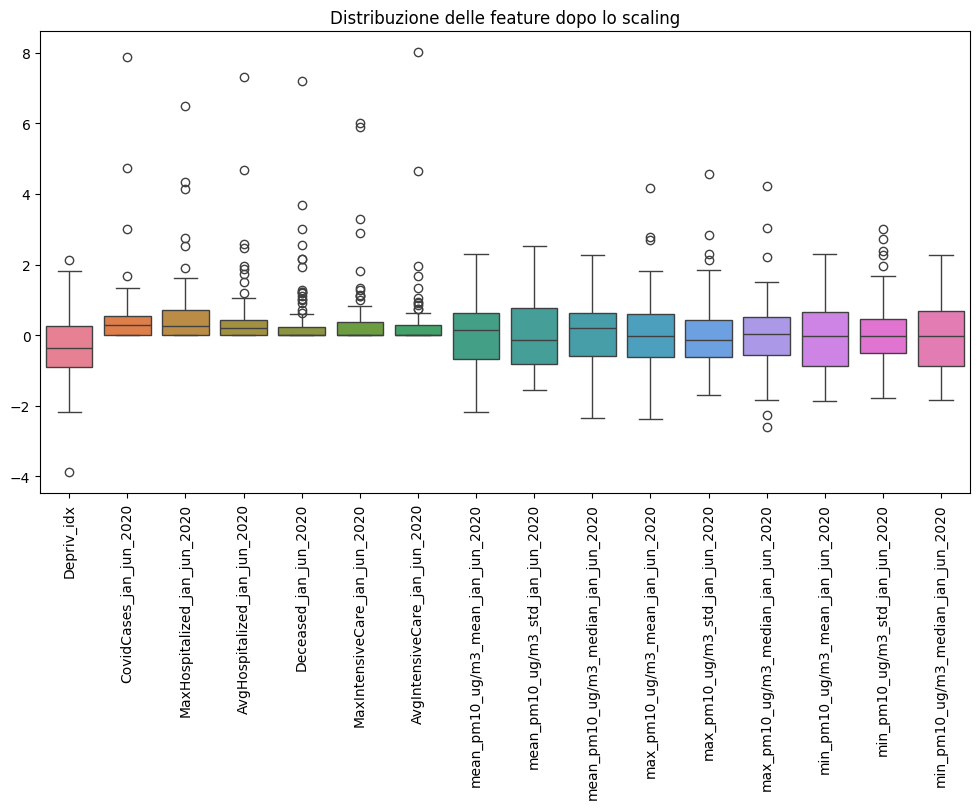

In [21]:
# Scalo di dati delle colonne che mi interessano in modo differente se si tratta di conteggi o altre quantità (inq)
cvdata_k=cvdata_cleaned.iloc[:,6:22]
cont_k=cvdata_k.iloc[:,:7]
other_k=cvdata_k.iloc[:,7:]
scaler_cont = StandardScaler(with_mean=False) # StandardScaler serve per avere dati con media 0 e dev standard 1. with_mean=False serve per non avere media 0
scaler_other = StandardScaler()

#Processo di scaling
cont_scal = scaler_cont.fit_transform(cont_k) # fit calcola sigma e mu
other_scal = scaler_other.fit_transform(other_k)
cvdata_kscal = pd.DataFrame(cont_scal, index=cvdata_k.index, columns=cont_k.columns).join(pd.DataFrame(other_scal, index=cvdata_k.index, columns=other_k.columns))

# Visualizzazione del risultato che mi sottolinea più il problema oulier è il boxplot:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cvdata_kscal)
plt.xticks(rotation=90)  # Ruota i nomi delle feature se sono molte
plt.title("Distribuzione delle feature dopo lo scaling")
plt.show()


L'uso di StandardScaler(with_mean=False) viene utilizzato sulle variabili dei conteggi, qui infatti non è utile centrare i dati attorno a zero (sempre positivi).

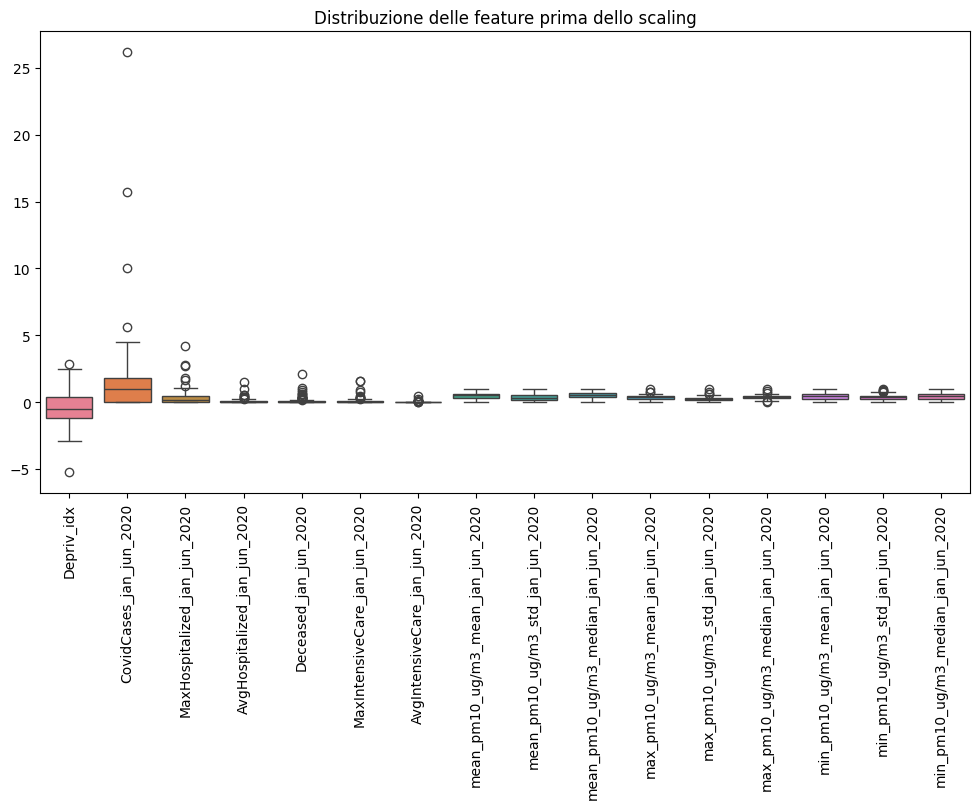

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cvdata_k)
plt.xticks(rotation=90)  # Ruota i nomi delle feature se sono molte
plt.title("Distribuzione delle feature prima dello scaling")
plt.show()

La differenza con le features non scalate è netta:
Va sottolineato che l'uso in visualizzazione del box-plot non è una scelta casuale ma è stata valutata in quanto è quello che meglio sottolinea la distribuzione e outlier.

Viene definita una funzione che applica il K-Means sul dataset scalato per i valori di K richiesti.
Parametri richiesti:
- DataFrame con le feature scalate;
- lista con i valori di k da testare;
- evaluate_CH: se True, calcola l'indice di Calinski-Harabasz per trovare il k ottimale

Ritorna:
- DataFrame con le assegnazioni ai cluster per ogni valore di k;
- Grafico dell'inerzia (utile per l'elbow method).

Quindi grazie a questo è possibile stimare il numero migliore di Cluster con il metodo del "gomito", sicuramente e se è considerato necessario anche con Calinski-Harabasz.


 Numero ottimale di cluster secondo Calinski-Harabasz: 3 (Valore CH: 36.50)


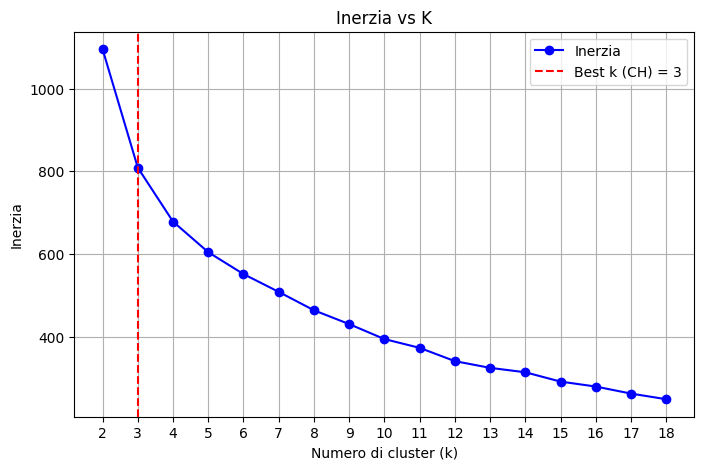

In [23]:
def function_k(cvdata_kscal, k_values, evaluate_CH=True):
    # liste e dizionario che conterrà assegnamenti ai cluster
    inertia_values = []
    calinski_harabasz_scores = [] if evaluate_CH else None
    
    cluster_results = {}

    for k in k_values:
        # Applica KMeans con il numero di cluster k (seme fisso)
        kmeans = KMeans(n_clusters=k, n_init=20, random_state=42) # 20= # volte in cui viene eseguito con =/ init per mitigare problema della inizializzazione
        labels = kmeans.fit_predict(cvdata_kscal) #calcola centroidi, restituisce lables assegna ogni pto ad un centroide
        
        # Salvataggio risultati 
        cluster_results[f"{k}_clusters"] = labels # etichette assegnate ai cluster
        inertia_values.append(kmeans.inertia_)
        if evaluate_CH:
            calinski_harabasz_scores.append(calinski_harabasz_score(cvdata_kscal, labels))

    # Converte il dizionario cluster_result in un DataFrame con le assegnazioni ai cluster per ogni valore di k
    df_clusters = pd.DataFrame(cluster_results, index=cvdata_kscal.index)

    # Trova il miglior k secondo il criterio di Calinski-Harabasz
    if evaluate_CH:
        best_k_CH = k_values[np.argmax(calinski_harabasz_scores)] # Trova l'indice del val max CH e recupera val k corr.
        print(f" Numero ottimale di cluster secondo Calinski-Harabasz: {best_k_CH} "
              f"(Valore CH: {max(calinski_harabasz_scores):.2f})")

    # Grafico
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, inertia_values, marker="o", linestyle="-", color="b", label="Inerzia")
    plt.xlabel("Numero di cluster (k)")
    plt.ylabel("Inerzia")
    plt.title("Inerzia vs K")
    plt.xticks(k_values)
    
    # Evidenzia il miglior k se il CH è attivo
    if evaluate_CH:
        plt.axvline(best_k_CH, color='r', linestyle='--', label=f"Best k (CH) = {best_k_CH}")

    plt.legend()
    plt.grid(True)
    plt.show()

    return df_clusters

df_clusters = function_k(cvdata_kscal, k_values=range(2, 19), evaluate_CH=True)


Quindi valutando il grafico qualitativamente e considerato il metodo CH, è ben solido affermare che da k=3 la diminuzione di inerzia si stabilizza ed inizia a decrescere in maniera meno brusca.
Ora si è ritenuta cosa sensata andare a capire che dati vengono risolti in questi 3 cluster.

Si è ritenuto consono utilizzare dei violin plot al fine di visualizzare i valori dei 3 Cluster in funzione delle features. La decisione è ricaduta su questo tipo di grafici in quanto riescono a riassumere, e di conseguenza fornire, più informazioni rispetto ad altri (box plot ad esempio).
Infatti per ogni cluster è mostrata la distribuzione dei dati dove la larghezza indica la densità dei dati presenti nella determinata regione e include le statistiche del box plot.
Grazie a questi quindi si può valutare la distribuzione delle variabili tra i 3 cluster, capire se essi sono distinti e identificare dei pattern.

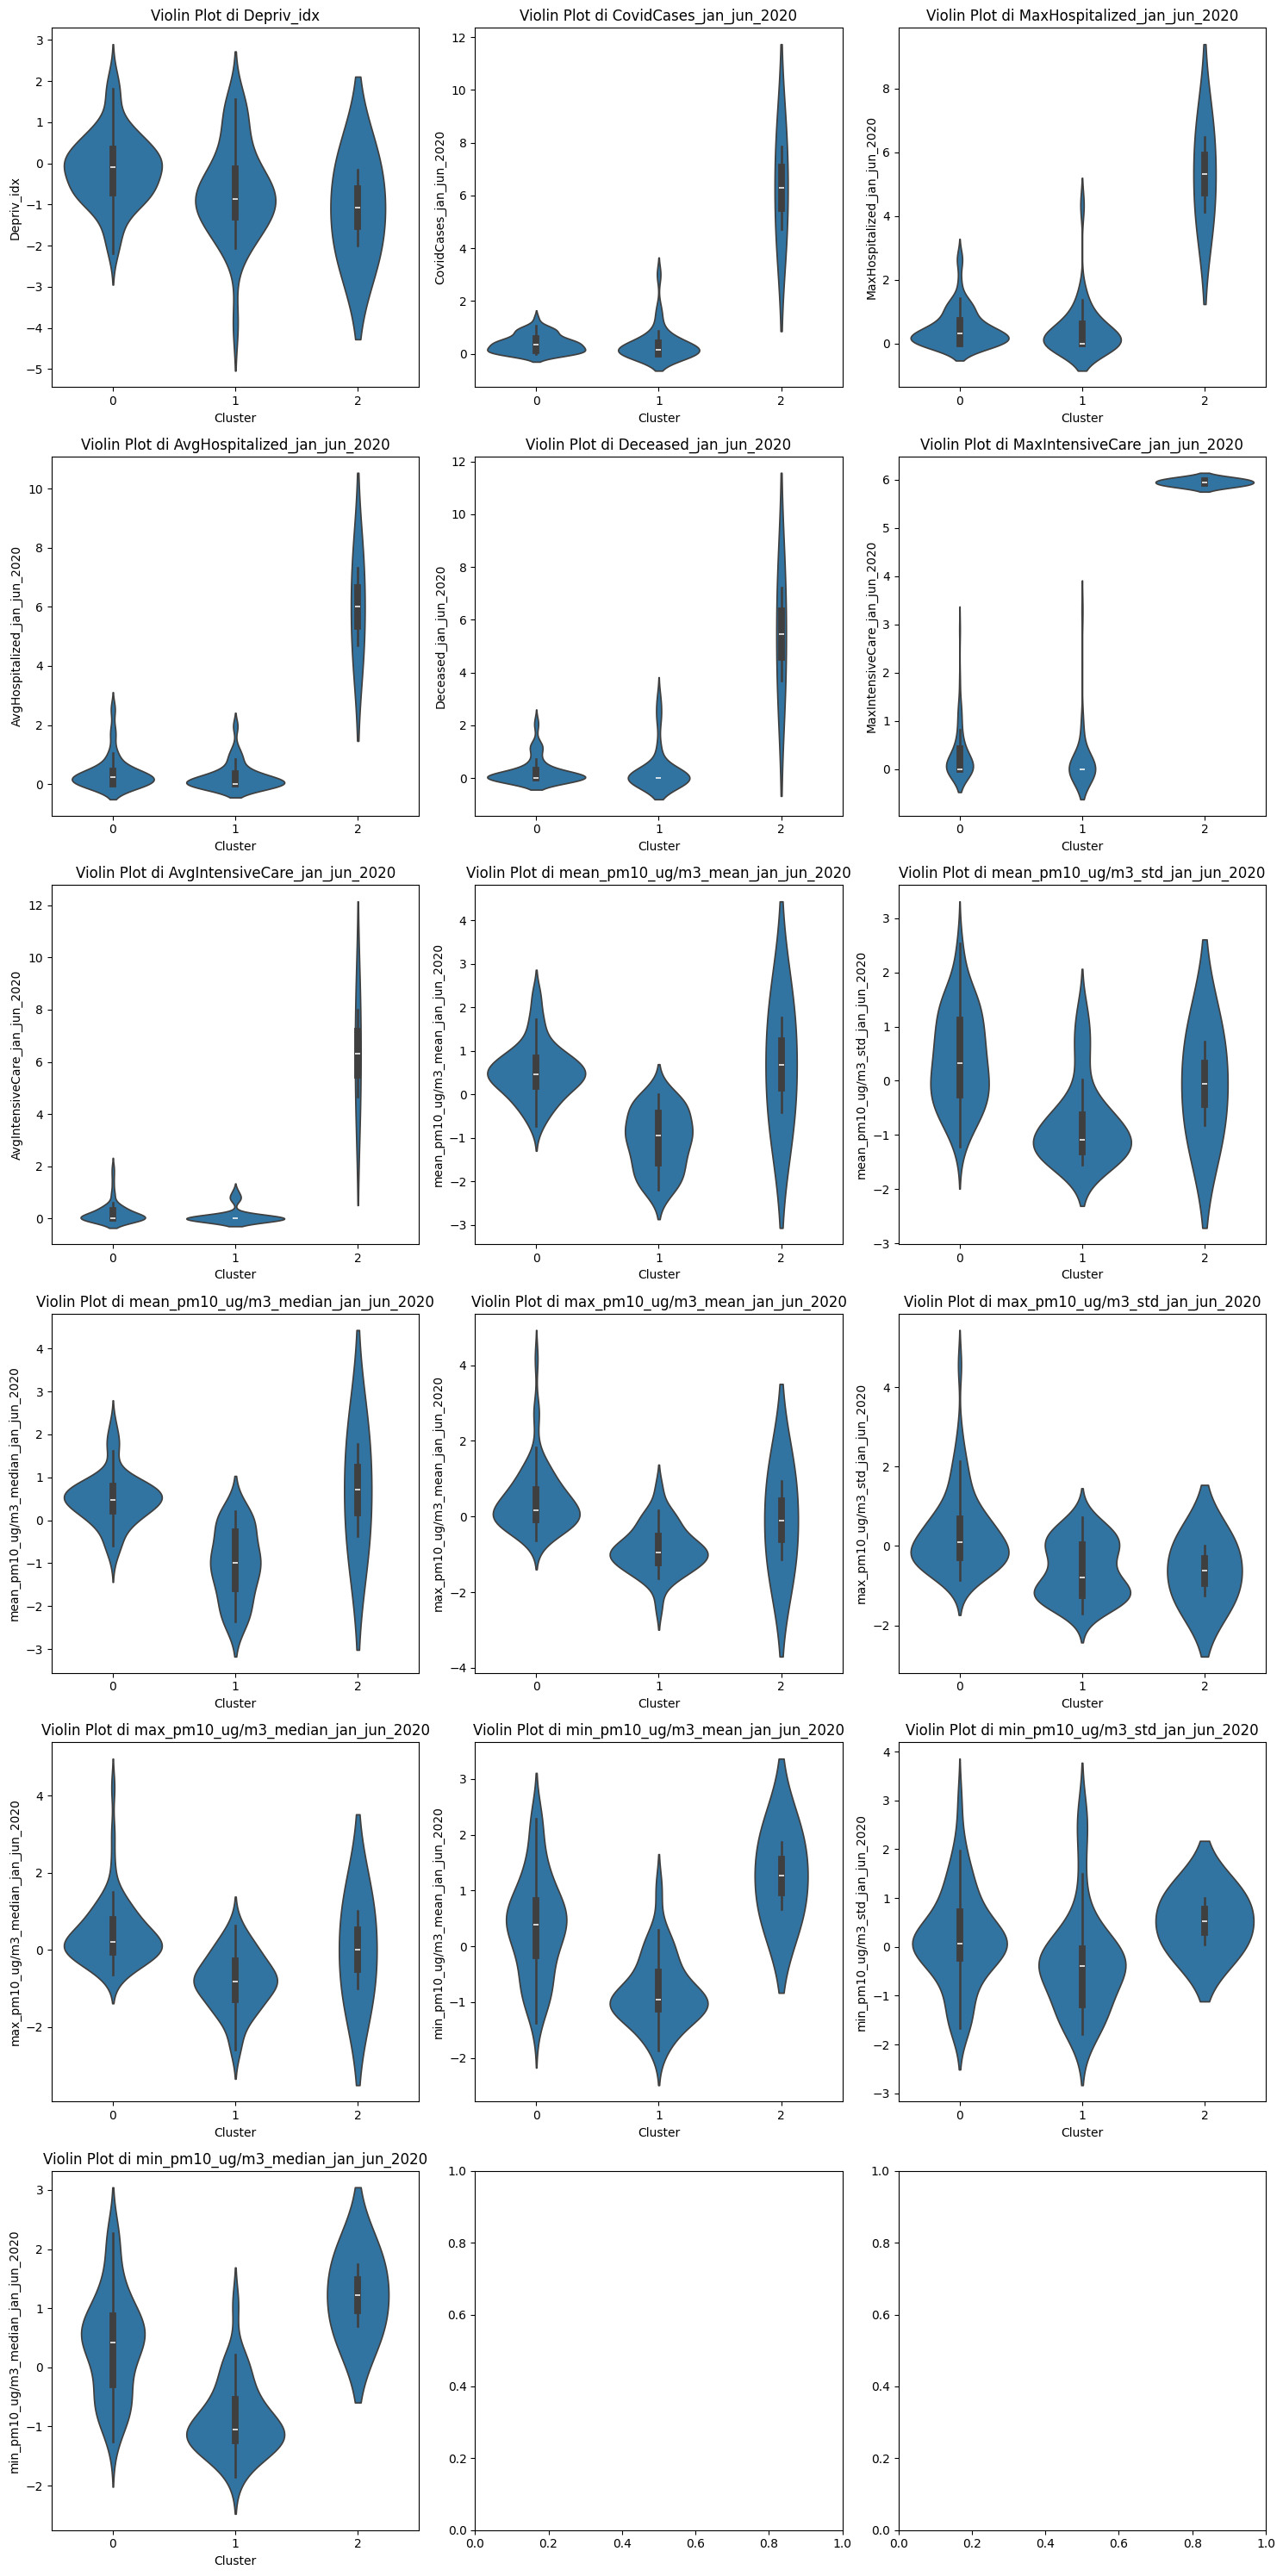

In [24]:
# Crea una copia temporanea con i cluster
cvdata_temp = cvdata_kscal.copy()
cvdata_temp['Cluster'] = df_clusters["3_clusters"] # Aggiunge una colonna 'Clusters' al DataFrame temporaneo dalla colonna '3_clusters'

# Numero di features
num_features = len(cvdata_kscal.columns) # num features=num subplots
num_cols = 3  # Numero di colonne nei subplot (3 grafici per ogni riga)
num_rows = int(np.ceil(num_features / num_cols))  # Calcola il numero di righe necessario per tutti i grafici (arrotonda per eccesso ceil)

# Crea la figura con subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Rende la griglia di subplot un array 1D (accedi ai subplots con 1 solo indice)

# Disegna i violin plot per ogni feature con l'indice i
for i, feature in enumerate(cvdata_kscal.columns):
    sns.violinplot(x='Cluster', y=feature, data=cvdata_temp, ax=axes[i]) # Violin plot per ogni feature
    axes[i].set_title(f'Violin Plot di {feature}')


plt.tight_layout()
plt.show()

Nel caso in esame per alcune features è possibile notare cluster più separati implicando la significatività di questo processo (features epidemiologiche).

Le features relative ai valori di PM10 mostrano invece più sovrapposizioni tra i cluster.

Si nota, inoltre, come alcuni abbiano distribuzioni più eterogenne per alcune features (Cluster 2 x features [1:7] => regioni con situazioni disparate) mentre in altri casi notiamo distribuzioni omogenne (Cluster 0, 1 x stesse features).

In generale per alcune variabili i Cluster 0, 1 sembrano avere caratteristiche in comune, mentre il Cluster 2 ha distribuzioni molto diverse (differenza evidenziata soprattuto nei paramentri epidemiologici).

Si è ora proiettato i grafici su mappa, a differenza di prima si tiene conto della posizione con la media dei valori di lat e lng in quanto richiesto espressivamente.

In [25]:
# Prima è necessario unire i due dataset
cvdata_cluster = pd.concat([cvdata_cleaned.iloc[:,:6],cvdata_temp,cvdata_cleaned.iloc[:,22:]], axis=1)
print(cvdata_cluster.columns)

Index(['City', 'lat', 'lng', 'Population', 'Density', 'Surface', 'Depriv_idx',
       'CovidCases_jan_jun_2020', 'MaxHospitalized_jan_jun_2020',
       'AvgHospitalized_jan_jun_2020', 'Deceased_jan_jun_2020',
       'MaxIntensiveCare_jan_jun_2020', 'AvgIntensiveCare_jan_jun_2020',
       'mean_pm10_ug/m3_mean_jan_jun_2020', 'mean_pm10_ug/m3_std_jan_jun_2020',
       'mean_pm10_ug/m3_median_jan_jun_2020',
       'max_pm10_ug/m3_mean_jan_jun_2020', 'max_pm10_ug/m3_std_jan_jun_2020',
       'max_pm10_ug/m3_median_jan_jun_2020',
       'min_pm10_ug/m3_mean_jan_jun_2020', 'min_pm10_ug/m3_std_jan_jun_2020',
       'min_pm10_ug/m3_median_jan_jun_2020', 'Cluster',
       'mean_pm10_ug/m3_mean_2019', 'mean_pm10_ug/m3_std_2019',
       'mean_pm10_ug/m3_median_2019', 'max_pm10_ug/m3_median_2019',
       'max_pm10_ug/m3_mean_2019', 'max_pm10_ug/m3_std_2019',
       'min_pm10_ug/m3_median_2019', 'min_pm10_ug/m3_mean_2019', 'Zone'],
      dtype='object')


In [26]:
# Creata la mappa centrata in Umbria
mappa_c = folium.Map(location=[cvdata_cluster['lat'].mean(), cvdata_cluster['lng'].mean()], zoom_start=8)  

# Creato il choropleth
choropleth = folium.Choropleth(
    geo_data=gdf,  # File con i confini geografici
    name="Choropleth",
    data=cvdata_cluster,
    columns=['City', 'Cluster'],  # Colonne: Nome del comune + Dati da visualizzare
    key_on="feature.properties.name",  # Chiave per unire il dataset al GeoJSON 
    fill_color="PuBuGn",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Cluster Map",
    highlight=True,
    smooth_factor=0.3
)

# Aggiunto il choropleth alla mappa
choropleth.add_to(mappa_c)

# Creazione del tooltip con le informazioni
tooltip_features = ['City' ,'Zone']  # Dati da mostrare nel tooltip

# Aggiunge i dati dal dataframe al GeoJSON
for f in choropleth.geojson.data['features']:
    # Trova il nome del comune (identificato nella chiave 'name')
    feature_name = f['properties']['name']
    
    # Trova i dati corrispondenti nel dataframe
    city_data = cvdata_cluster[cvdata_cluster['City'] == feature_name]
    
    if not city_data.empty:
        # Aggiunge i dati al GeoJSON 'properties' per ogni comune
        for tooltip in tooltip_features:
            f['properties'][tooltip] = str(city_data.iloc[0][tooltip])

# Aggiunge il GeoJsonTooltip alla mappa, utilizzando i dati nelle proprietà
folium.GeoJsonTooltip(fields=tooltip_features, aliases= ['Città: ', 'Zona: ']).add_to(choropleth.geojson)

mappa_c

Il terzo cluster (Cluster 2) si nota dalla mappa che è composto solo da due comuni: Porano e Giove.
Questo ci sottolinea nuovamente l'anomalia di questi due comuni soprattuto nei dati epidemiologici a rafforzamento delle ipotesi precedentemente spiegate. A tal fine come ultima analisi si creerà uno scatter plot 3D.

#### Clustering con PCA:

Il clustering con PCA (Principal Component Analysis) è una tecnica che combina i due approcci:
- Clustering: come con K-Means, raggruppa dati in insiemi simili;
- PCA: tecnica che riduce la dimensionalità dei dati, eliminando le collinearità ma preservando quanta più varianza possibile nei dati originali.

In particolare essa prende un dataset generale fornito con _n_ features, le combina poi linearmente per crearne di nuove: PC1, PC2, ...
$$ PC_i = \phi_{i1} X_1 + \phi_{i2} X_2 + ... + \phi_{in} X_n $$

Dove le _X_ sono le features originali e le $\phi$, invece i pesi calcolati dalla PCA (loading).

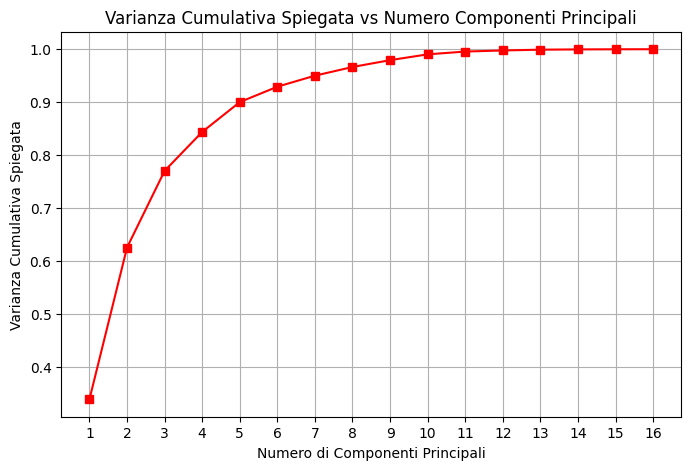

In [27]:
from sklearn.decomposition import PCA

pca=PCA() 
# Calcolo matrice della covarianza
X_pca=pca.fit_transform(cvdata_kscal) #dati trasformati (score matrix)

# La score matrix è la matrice con dati proiettati nello spazio delle componenti principali
# Ha dimensioni: (n. osservazioni) x (n. componenti principali)

varianza_spiegata = pca.explained_variance_ratio_  # Restituisce un array con la percentuale di varianza spiegata da ciascuna componente principale

# Calcolare la varianza cumulativa (somma progressiva delle varianze spiegate)
varianza_cumulativa = np.cumsum(varianza_spiegata)

# Creare l'asse x con il numero di componenti principali (+1 per tutti i valori di pca sennò arange non include l'ultimo valore)
x = np.arange(1, pca.n_components_ + 1)

# Plot della varianza cumulativa spiegata
plt.figure(figsize=(8, 5))
plt.plot(x, varianza_cumulativa, '-s', color='r')
plt.title("Varianza Cumulativa Spiegata vs Numero Componenti Principali")
plt.xlabel("Numero di Componenti Principali")
plt.ylabel("Varianza Cumulativa Spiegata")
plt.xticks(x)
plt.grid(True)


Sempre considerando valido il metodo "a gomito" si considera un buon compromesso scegliere il numero di PC=3.

In [28]:
print(f"Varianza cumulativa con 3 PC: {varianza_cumulativa[2]:.2f}")

Varianza cumulativa con 3 PC: 0.77


 Questo in quanto un grafico a 3 dimensioni è ben leggibile e riesce a spiegare il 77% della varianza dei dati; risultato accettabile.

 Risulta molto utile visualizzare come le nuove feature (PC1, PC2 e PC3) dipendano da quelle di partenza, o meglio in che modo le features originali influenzano le PCi.
 A tal fine si costruiscono 3 bar plot dei loading:

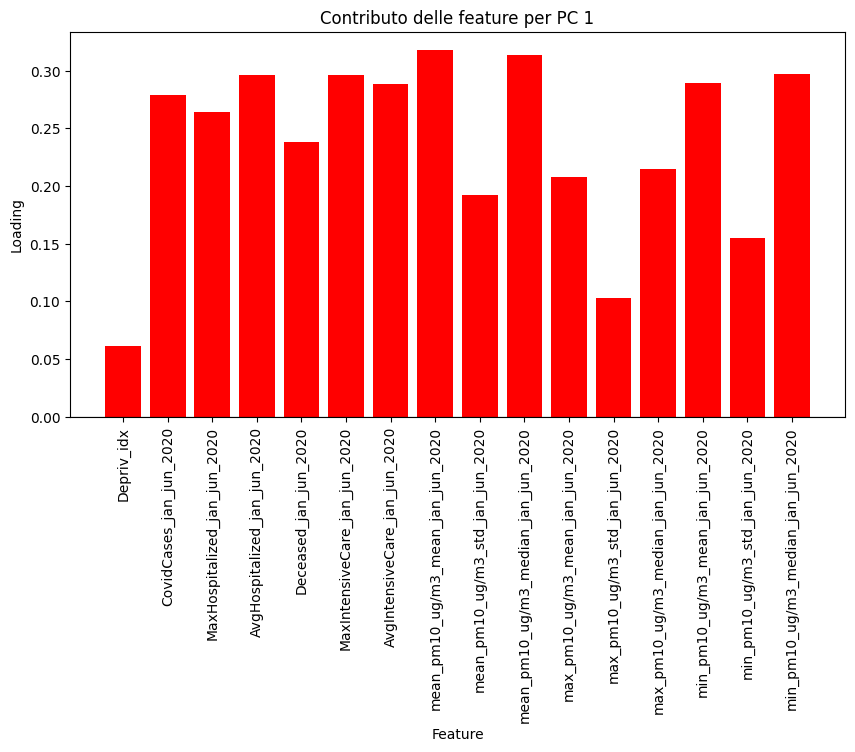

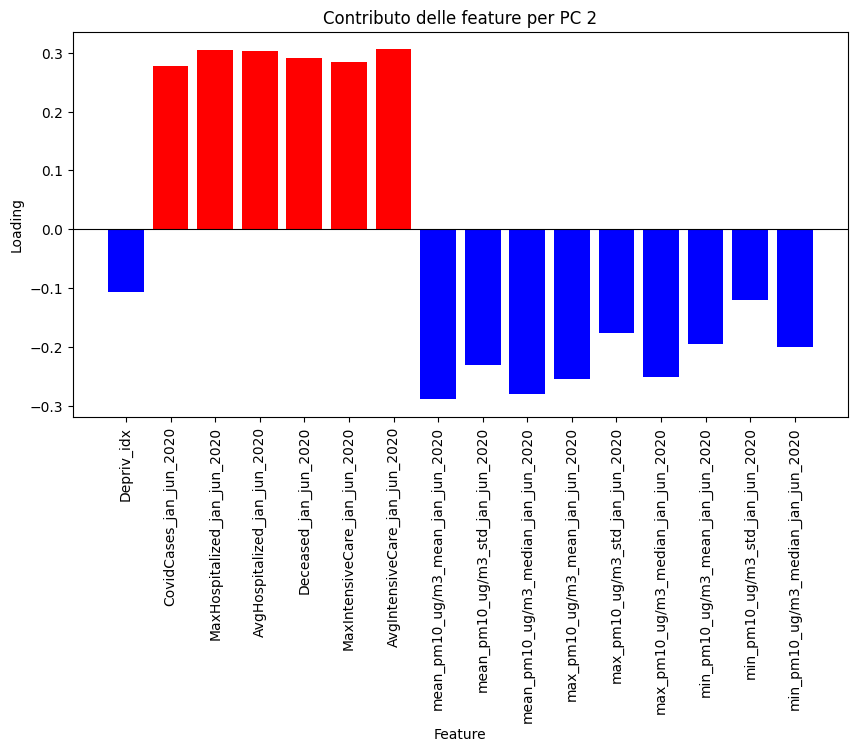

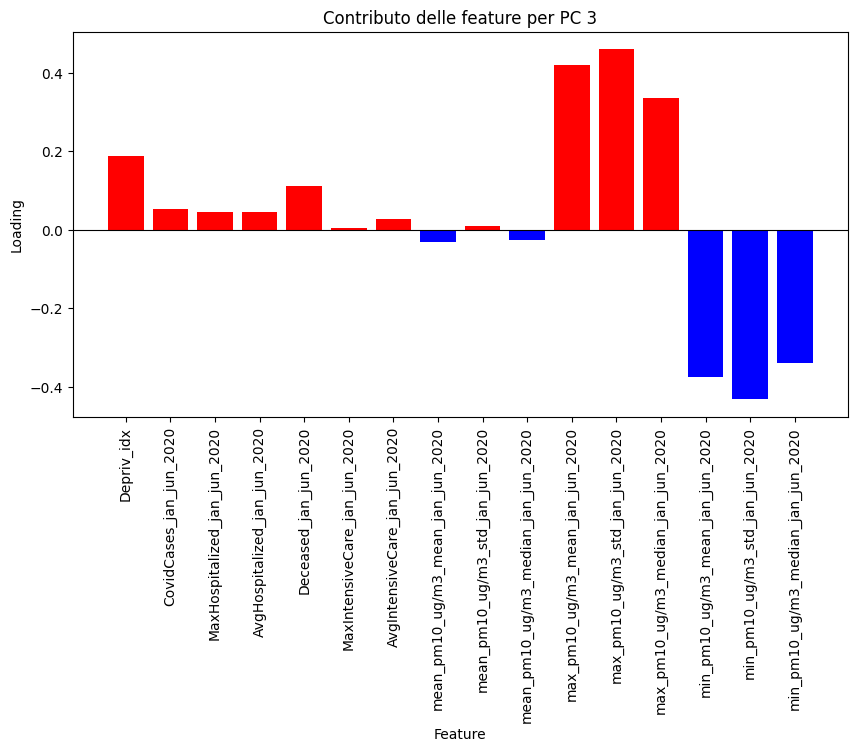

In [29]:
components = pca.components_[:3]  # Prendiamo solo i loading delle prime 3 PC
features = cvdata_kscal.columns

for i in range(3):  # Loop sulle 3 PC
    plt.figure(figsize=(10, 5))
     # Usa una mappa di colori che riflette il valore del loading
    colors = ["red" if v > 0 else "blue" for v in components[i]]
    plt.bar(features, components[i], color=colors)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.xticks(rotation=90)
    plt.title(f"Contributo delle feature per PC {i+1}")
    plt.xlabel("Feature")
    plt.ylabel("Loading")
    plt.show()

Risalta come la PC1, per definizione la più importante (varianza spiegata maggiore), sia altamente dipendente da quasi tutte le features. La seconda componente principale, invece, riceve contributi positivi dalle features epidemiologiche, negative da quelle relative all'inquinamento. La PC3 è estremamente meno dipendente dalle features di partenza, infatti molti dei Loading sono quasi nulli. Gli unici contributi rilevanti sono quelli derivanti dal min\max della media, mediana e deviaizone standard dell'inquinamento.

Rpetiamo la clusterizzazione:

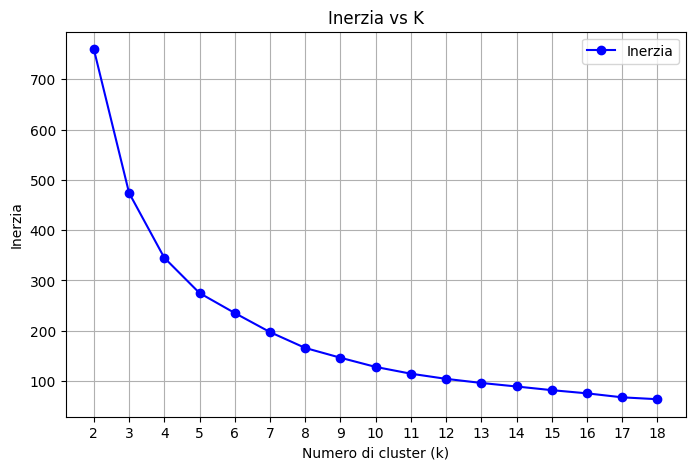

In [30]:
# Esegue PCA per ridurre il set di dati a 3 componenti principali
pc3 = PCA(n_components=3)
pca_data = pc3.fit_transform(cvdata_kscal)  # Trasforma i dati in 3 componenti principali

cvdata_scalpc_df = pd.DataFrame(pca_data) # Dati convertiti in Dataframe
# Rinomina le colonne del DataFrame con i risultati della PCA
cvdata_scalpc_df.columns = ['pc1', 'pc2', 'pc3']
# Richiama la funzione "function_k" che crea un grafico inerzia vs numero cluster e crea un nuovo DataFrame con i cluster assegnati
df_clusters_pc = function_k(cvdata_scalpc_df, k_values=range(2, 19), evaluate_CH=False)

Inerzia è diminuita=> per la clusterizzazione risulta più efficente il metodo PCA (3) in questo caso. Si evince che il numero di cluster più adatto sia 4 (elbow method).

In [31]:
df_clusters_pc.head()

2_clusters  3_clusters  4_clusters  5_clusters  6_clusters  7_clusters  \
0           0           2           2           4           0           2   
1           0           0           3           3           0           2   
2           0           2           2           0           3           5   
3           0           2           2           4           3           0   
4           0           0           1           1           0           2   

   8_clusters  9_clusters  10_clusters  11_clusters  12_clusters  13_clusters  \
0           3           8            9            1            3           12   
1           0           5            9            1            3           12   
2           6           0            4           10            9            4   
3           6           0            4            9            1            9   
4           0           5            9            1           11           12   

   14_clusters  15_clusters  16_clusters  17_clusters  18_clusters  
0           10           12            5            3           13  
1           13           12            0           14            1  
2            3            4            1            0           15  
3           10            1            5           11            7  
4           13            5            0           14            1

In [32]:
cvdata_cluster_pc = pd.concat([cvdata_cleaned, df_clusters_pc, cvdata_scalpc_df], axis=1)
print(cvdata_cluster_pc.columns)

Index(['City', 'lat', 'lng', 'Population', 'Density', 'Surface', 'Depriv_idx',
       'CovidCases_jan_jun_2020', 'MaxHospitalized_jan_jun_2020',
       'AvgHospitalized_jan_jun_2020', 'Deceased_jan_jun_2020',
       'MaxIntensiveCare_jan_jun_2020', 'AvgIntensiveCare_jan_jun_2020',
       'mean_pm10_ug/m3_mean_jan_jun_2020', 'mean_pm10_ug/m3_std_jan_jun_2020',
       'mean_pm10_ug/m3_median_jan_jun_2020',
       'max_pm10_ug/m3_mean_jan_jun_2020', 'max_pm10_ug/m3_std_jan_jun_2020',
       'max_pm10_ug/m3_median_jan_jun_2020',
       'min_pm10_ug/m3_mean_jan_jun_2020', 'min_pm10_ug/m3_std_jan_jun_2020',
       'min_pm10_ug/m3_median_jan_jun_2020', 'mean_pm10_ug/m3_mean_2019',
       'mean_pm10_ug/m3_std_2019', 'mean_pm10_ug/m3_median_2019',
       'max_pm10_ug/m3_median_2019', 'max_pm10_ug/m3_mean_2019',
       'max_pm10_ug/m3_std_2019', 'min_pm10_ug/m3_median_2019',
       'min_pm10_ug/m3_mean_2019', 'Zone', '2_clusters', '3_clusters',
       '4_clusters', '5_clusters', '6_clusters', '7

Ora come richiesto si visualizzerà un grafico 3D (in quanto il numero scelto delle componenti principali è 3), che mostrerà i dati divisi in 4 cluster (numero di questi è stato valutato come spiegato sopra).

A tal fine è stata valutata l'ipotesi di uno grafico scatter, di modo che forma e colore dei dati può separarli in maniera evidente.


In [33]:
def build_3d_scatter_plot(df, x_col, y_col, z_col, cluster_col, hover_col, title='Scatter Plot 3D', **kwargs): # **kwargs: Argomenti opzionali per passare configurazioni aggiuntive a Plotly
    def scatter_3d_updater():
        fig = px.scatter_3d(df, 
                            x=x_col,  
                            y=y_col,  
                            z=z_col,  
                            color=cluster_col,  
                            symbol=cluster_col,  
                            hover_name=hover_col,  
                            **kwargs)
        
        fig.update_traces(marker=dict(size=5), showlegend=False)

        fig.update_layout(
            title=title,
            scene=dict(
                xaxis_title=x_col,  
                yaxis_title=y_col,
                zaxis_title=z_col
            ),
            margin=dict(l=0, r=0, b=0, t=40)
        )
        
        fig.show()
    
    return scatter_3d_updater

# Esegue la funzione x lo scatter 3D di 3 componenti principali con i cluster assegnati
scatter_3d_plot = build_3d_scatter_plot(
    df=cvdata_cluster_pc, 
    x_col='pc1',  
    y_col='pc2',  
    z_col='pc3',  
    cluster_col='4_clusters',  
    hover_col='City',  
    title='3D Scatter Plot of PCA Components with Clusters'
)

scatter_3d_plot()



Di nuovo, una chiara evidenza di come i due comuni di Giove e Porano si distacchino evidentemente anche nello spazio delle PCi.

### Supervised Learning

#### Linear regression

Il Supervised Learning è una tecnica di statistical learning in cui il modello si addestra con un determinato set (training set) al fine di prevedere dei dati non ancora utilizzati al fine di training (test set).

In questo caso si utilizzeranno due metodi per effettuare una regressione al fine di prevedere il rapporto tra:
- Casi covid;
- Popolazione.

Mentre come input verranno utilizzate le colonne riguardanti: lat, lng, superficie, il valore medio espresso in μg/m3 della media giornaliera di pm10 rilevato nel periodo gen-giu 2020, il valore medio espresso in μg/m3 della deviazione standard giornaliera di pm10 rilevato nel periodo gen-giu 2020 e il valore medio espresso in μg/m3 della mediana giornaliera di pm10 rilevato nel periodo gen-giu 2020.

A tal fine si parte con una regressione lineare, i motivi di questa scelta sono i seguenti:
1. Facilità di interpretazione: permette di valutare l'influenza delle features attraverso i coefficienti (pesi);
2. Costo computazionale e velocità: è, infatti, computazionalmente leggero e facile da addestrare;
3. Baseline iniziale: in qualche modo è uno primo sguardo al comportamento del modello (punto di riferimento), utile per confrontare le prestazioni di modelli più complessi.


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Selezionoa le colonne tra Features x e Target y
x = cvdata_cleaned_nn[["lat", "lng", "Surface", 
        "mean_pm10_ug/m3_mean_jan_jun_2020", 
        "mean_pm10_ug/m3_std_jan_jun_2020", 
        "mean_pm10_ug/m3_median_jan_jun_2020"]] 
y = cvdata_cleaned[["CovidCases_jan_jun_2020"]]/1000
# Splitta i dati in training e test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Addestramento del modello
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)  # Prevede sui dati di test
print(y_pred[:5])

[[0.00149807]
 [0.00246968]
 [0.00036003]
 [0.00132724]
 [0.00061323]]


In [35]:
x

lat        lng  Surface  mean_pm10_ug/m3_mean_jan_jun_2020  \
0   42.691173  12.546451    81.61                          16.448845   
1   42.812033  11.973053    82.61                          16.009011   
2   42.588208  12.295936    23.90                          22.556083   
3   42.553528  12.416776   132.50                          18.391294   
4   42.583433  12.769865    41.04                          13.751943   
..        ...        ...      ...                                ...   
87  43.206848  12.074615    55.89                          19.158259   
88  43.305636  12.336622   200.83                          17.415113   
89  43.158897  12.600896    92.30                          16.041621   
90  42.754621  12.863760    36.22                          11.821318   
91  43.058282  12.754656    40.57                          14.153393   

    mean_pm10_ug/m3_std_jan_jun_2020  mean_pm10_ug/m3_median_jan_jun_2020  
0                           7.735424                            15.089290  
1                           8.708984                            14.280218  
2                          11.939011                            19.562969  
3                           8.453660                            16.210499  
4                           6.993753                            12.296421  
..                               ...                                  ...  
87                         14.846033                            16.056410  
88                         12.497089                            14.874236  
89                         10.768399                            14.275885  
90                          6.803103                            10.104532  
91                          8.668405                            12.479675  

[92 rows x 6 columns]

In [36]:
y # Visualizzazione del target

CovidCases_jan_jun_2020
0                  0.001301
1                  0.001742
2                  0.001401
3                  0.000422
4                  0.002590
..                      ...
87                 0.000000
88                 0.001747
89                 0.002435
90                 0.000000
91                 0.000755

[92 rows x 1 columns]

Prima di valutare il modello è stato ritenuto consono allo scopo andare a comprendere se la regressione è stata correttamente addestrata.
Per far ciò ci vengono incontro due parametri: i coefficienti (pesi) e l'intercetta.
Ogni coefficiente misura quanto una feature influisce sul target.
L'intercetta, invece, rappresenta la previsione del modello quando le features sono zero.

In [37]:
print("Coefficienti:", model.coef_)
print("Intercept:", model.intercept_)

Coefficienti: [[ 9.23349432e-04 -3.82103310e-03  5.91738021e-07  1.65351013e-03
  -6.34475314e-04 -1.77886381e-03]]
Intercept: [0.01363787]


I valori dei coefficienti risultano piuttosto piccoli. Tuttavia, è possibile osservare che alcuni coefficienti sono significativamente più grandi rispetto ad altri, suggerendo che alcune features abbiano un impatto maggiore sul modello. Nonostante ciò, i valori generalmente bassi dei pesi indicando che nessuna di esse contribuisce in maniera determinante alla previsione.

Al fine di valutare la bontà del modello (splittato con train test split considerando i dati di training come un 80%) si sono valutati alcuni parametri quali:
- MAE (Mean Absolute Error);
- RMSE (Root Mean Squared Error)
- $R^2$;

$$ MAE = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i |$$

Dove:  
- $ y_i $ è il valore reale.  
- $ \hat{y}_i $ è il valore predetto dal modello.  
- $ n $ è il numero totale di osservazioni.  

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

Dove:  
- $ (y_i - \hat{y}_i)^2 $ è l’errore al quadrato per ogni osservazione.  
- La radice quadrata riporta l’errore alla stessa unità di misura della variabile target.

$$ R^2= 1- \frac {RSS}{TSS} $$

Dove:
- $RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $ è la somma dei residui al quadrato.  
- $ TSS = \sum_{i=1}^{n} (y_i - \bar{y})^2$ è la somma totale dei quadrati, ovvero la varianza totale dei dati reali.

Si è valutato di prendere queste 3 misure di errore per i seguenti motivi:
- MAE: è la misura dell'errore medio assoluto, cioè restituisce quanto il modello sbaglia in media.
 - RMSE: è la misura dell'errore medio, che però da più peso agli errori con valore più alto (outliers).
 - $R^2$: indica la percentuale di varianza spiegata dal modello. I valori vanno da $-infinity$ ad 1. Se il valore è circa 0: il modello non spiega i dati. Se è <0: risulta addirittura peggiore di una semplice media. Se =1: spiega in maniera impeccabile la variabilità dei dati.
 

Si è scelto di utilizzare sia MAE che RMSE poiché nonostante il primo sia di più facile interpretazione non riesce ad evidenziare gli errori più grandi (outlier).
Se i valori sono simili allora è solido affermare che gli errori hanno una distribuzione uniforme, se RMSE>>MAE => il modello presenta molti outlier, che pesano di più nell'RMSE.

In [38]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.0028
RMSE: 0.0062
R² Score: -0.1911


L'errore medio assoluto è nell'ordine di $10^{-3}$ ed è molto significativp considerando i dati di output stampati in precedenza ($10^{-3}$).
RMSE è ancora più alto (circa il doppio), implicando che il modello non solo non sia preciso ma siamo in presenza di outliers rilevanti.
Il valore ottenuto da $R^2$ testimonia che il modello non non performa bene per quanto spiegato prima.

La cattiva performance di questo modello potrebbe essere in linea teorica attribuibile alla scelta di train & data set. A questo scopo si è considerato di effettuare una K-fold cross-validation.

#### Linear regression con K-fold cross-validation

Questa tecnica permette di ottenere una stima più affidabile della performance del modello: migliora la valutazione dell'errore usando tutti i fold di dati sia per il training che per il test. Soprattuto come, nel nostro caso il set di dati non risulta affatto ampio.


1. Il set di dati viene diviso in K gruppi (fold) di dimensioni simili (5);
2. Per ogni iterazione (_k_), si addestra il modello con K-1 (4) parti che andranno a costituire il training set; mentre la parte restante il test;
3. Una volta ripetuto per tutti i K sottoinsiemi, il risultato sarà una media delle metriche di valutazione per ogni fold.


In [39]:
from sklearn.model_selection import cross_val_score, KFold

model_cv = LinearRegression() # Crea modello

kf= KFold(n_splits=5, shuffle=True, random_state=42) # Crea un oggetto KFold

r2_cv = cross_val_score(model_cv, x, y, scoring='r2', cv=kf) # Calcola R²
mae_cv = cross_val_score(model_cv, x, y, scoring='neg_mean_absolute_error', cv=kf)
rmse_scores = cross_val_score(model_cv, x, y, scoring='neg_root_mean_squared_error', cv=kf)

print(f"R²: {np.mean(r2_cv):.4f}")
print(f"MAE: {-np.mean(mae_cv):.4f}")
print(f"RMSE: {-np.mean(rmse_scores):.4f}")


R²: -1.4427
MAE: 0.0019
RMSE: 0.0032


Il valore di K=5 è stato scelto per la K-Fold Cross-Validation, tenendo conto delle dimensioni limitate del dataset (91 osservazioni). Un valore più alto di K avrebbe comportato test set troppo piccoli, riducendo la stabilità della valutazione del modello.

Nonostante l'applicazione della cross-validation, i risultati ottenuti per gli errori e l'$R^2$ non sono incoraggianti, anzi, mostrano un peggioramento rilevante per l'$R^2$ mentre un leggero miglioramento per la misura degli errori (che restano comunque nell'ordine deìi grandezza degli output).

Poiché i coefficienti della linear regression, stampati poco sopra, risultano non molto rilevanti per il modello, si considera di procede con il metodo OLS (Ordinary Least Squares) per un'analisi più approfondita. In particolare, verrà valutato il p-value di ciascun coefficiente per determinare se sia opportuno continuare l'indagine con un modello lineare. Se i p-value risultano superiori alla soglia di significatività (ad esempio, 0.05), si potrebbe considerare di eliminare le feature non significative, non potendo rifiutare la null hypotesis e mantenendo solo i predictor realmente utili al modello.

In [40]:
import statsmodels.api as sm
x_const = sm.add_constant(x)
model_ols = sm.OLS(y,x_const).fit()
p_values = model_ols.pvalues
print("P-values:", p_values)

P-values: const                                  0.099777
lat                                    0.142236
lng                                    0.216114
Surface                                0.942906
mean_pm10_ug/m3_mean_jan_jun_2020      0.809880
mean_pm10_ug/m3_std_jan_jun_2020       0.413491
mean_pm10_ug/m3_median_jan_jun_2020    0.931421
dtype: float64


I valori risultanti del p-value sono molto elevati e non vi è evidenza sufficiente per rifiutare la null-hypotesis anche se si aumentasse la permissività con una soglia di 0.1.

Questo implica che nessun predictor sia statisticamente significativo nel contribuire al target nel contesto di una regressione lineare. Di conseguenza modelli che regolano predictor sembrano poco promettenti sebbene non del tutto insensati (Lasso o Ridge Regression).

Si passa quindi "Beyond Linearity".

#### Decision Tree Regressor

Il modello che verrà discusso divide i dati in insiemi, via via più piccoli, creando un albero decisionale.
Il suo funzionamento può essere riassunto come segue:
1. Seleziona la variabile più rilevante (che minimizza l'errore di previsione);
2. Divide il dataset;
3. Ripete il processo per tutti i sottoinsiemi fino ad un criterio fornito in base al caso in esame;
4. La previsione è pertanto la media dei valori nei nodi terminali dell’albero ("foglie").

Si è optato per questa decisione nonostante l'esistenza di metodi più performanti in quanto può modellare relazioni non lineari ed è di facile interpretazione.
Tuttavia, un potenziale svantaggio è la tendenza all’overfitting, aspetto che verrà approfondito successivamente.

In [41]:
from sklearn.tree import DecisionTreeRegressor

# Inizializza e allena il Decision Tree
tree = DecisionTreeRegressor(random_state=42)  # Crescita libera
tree.fit(x_train, y_train)

# Predice i risultati sui dati di test
y_pred = tree.predict(x_test)

# Ripete le stesse metriche di valutazione
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R²:  {r2:.4f}")
print(f"RMSE:  {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R²:  -0.2556
RMSE:  0.0063
MAE: 0.0030


I risultati non sono soddisfacenti, a tal fine si visualizza l'albero decisionale così da poter valutatre le soluzioni possibili.

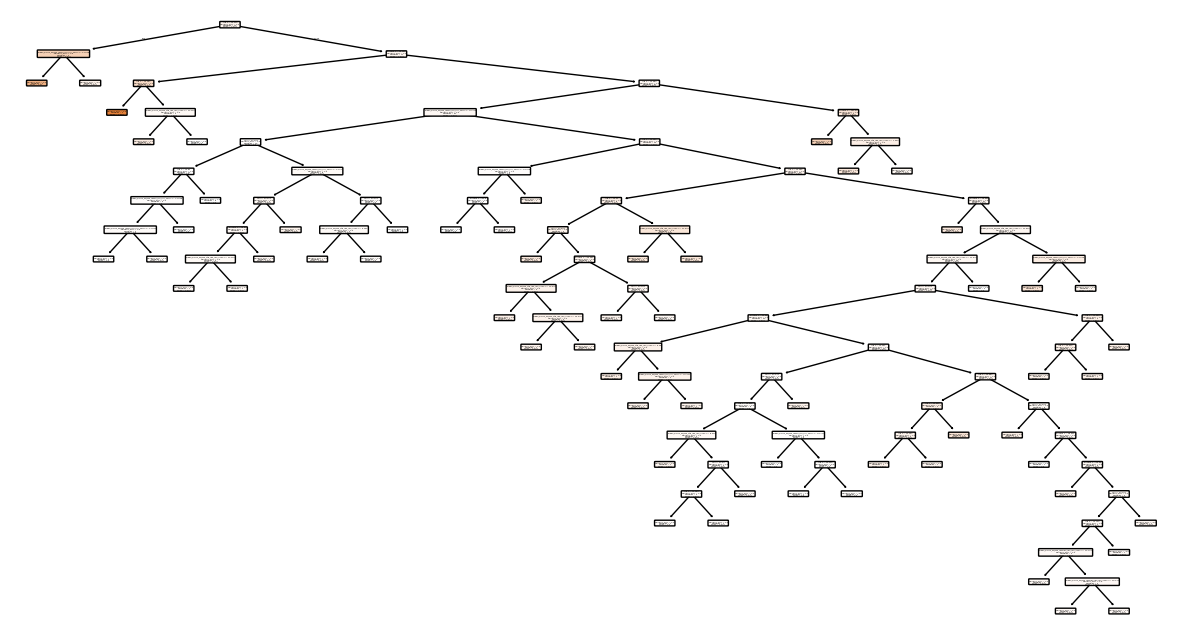

In [42]:
from sklearn.tree import plot_tree

# Visualizza l'albero
plt.figure(figsize=(15, 8))
plot_tree(tree, feature_names=x_train.columns, filled=True, rounded=True)
plt.show()


Il numero di nodi e di conseguenza quello delle fogli sembra abbastanza grande.

In [43]:
num_nodes = tree.tree_.node_count
num_leaves = sum(tree.tree_.children_left == -1) # Crea un array booleano per contare quanti nodi non hanno figli sinistri e somma

print(f"Numero di nodi: {num_nodes}")
print(f"Numero di foglie: {num_leaves}")

Numero di nodi: 117
Numero di foglie: 59


I dati di test risultano insufficienti per supportare un numero così elevato di foglie, e la bassa qualità dei risultati ($R^2$, MAE, RMSE) suggerisce una possibilità di overfitting nel modello addestrato sul train set. In tale contesto, è necessario considerare l'utilizzo di un albero più semplice, con un numero minore di nodi. Un approccio promettente in questo caso è il Cost Complexity Pruning, che consente di ottimizzare la complessità dell'albero di decisione, evitando un adattamento eccessivo ai dati di addestramento.
Il valore di $\alpha$ più consono è stato valutato con la cross validation (k=5) che minimizzasse il Mean Squared Error (MSE). 

Il CCP, a differenza della limitazione max_deph, ottimizza la dimensione dell'albero rispetto al parametro di complessità ($\alpha$) che bilancia il trade-off tra bias (errore sistematico legato all'impurità) e varianza (errore dovuto alla fluttuazione legato alla complessità).

A tal fine si è ritenuto consono analizzare il grafico del test/training error dell'albero al variare del numero dei nodi con la funzione max_deph iterata e confrontarlo con la CCP, per poi andare a valutarne la robustezza di previsione.

In [44]:
import plotly.graph_objects as go

# Funzione per calcolare errori e numero di nodi
def calculate_errors(depth_values, x_train, x_test, y_train, y_test):
    train_errors = []
    test_errors = []
    num_nodes = []
    
    for depth in depth_values: # Loop su tutti i valori di profondità
        model = DecisionTreeRegressor(max_depth=depth, random_state=42)
        model.fit(x_train, y_train)
        
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

        train_errors.append(mean_squared_error(y_train, y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))
        num_nodes.append(model.tree_.node_count)
    
    return train_errors, test_errors, num_nodes

depth_values = np.concatenate([np.arange(1, 6), np.arange(6, 21, 2)]) # Valori di profondità da 1 a 5 e da 6 a 20 con step 2 per maggiore dettaglio a basse profondità

# Calcolo errori e nodi
train_errors, test_errors, num_nodes = calculate_errors(depth_values, x_train, x_test, y_train, y_test)

# Inizializzazione un oggetto Figure (fig)
fig = go.Figure()

# Aggiunge a fig un grafico a dispersione per il train
fig.add_trace(go.Scatter(
    x=num_nodes, y=train_errors, mode='markers+lines',
    name="Training Error",
    marker=dict(color='blue', size=8),
    text=[f"Nodi: {n}" for n in num_nodes],  # Tooltip personalizzato
    hoverinfo="text+y" 
))

# Scatter per Test Error
fig.add_trace(go.Scatter(
    x=num_nodes, y=test_errors, mode='markers+lines',
    name="Test Error",
    marker=dict(color='red', size=8),
    text=[f"Nodi: {n}" for n in num_nodes],  # Tooltip personalizzato
    hoverinfo="text+y"
))

fig.update_layout(
    title="Training Error vs Test Error in funzione del Numero di Nodi",
    xaxis_title="Numero di Nodi",
    yaxis_title="Errore Medio Quadratico (MSE)",
    yaxis=dict(tickformat=".2e"), # Notazione scientifica per l'asse y
    template="plotly_white",
    hovermode="x unified" # Serve così che quando si passa sopra un punto si vedano entrambi i valori di errore
)

fig.show()

In [ ]:
full_tree = tree

train_errors_pruning = []
test_errors_pruning = []
num_nodes_pruning = []
alpha_used = []
alpha_scores = []


path = full_tree.cost_complexity_pruning_path(x_train, y_train) # Calcola il percorso di pruning
ccp_alphas = path.ccp_alphas #  Valori di alpha per il pruning

# Calcola l'errore per ogni alpha e lo aggiunge alla lista alpha_scores
for alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    scores = cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv=kf)
    alpha_scores.append((alpha, -np.mean(scores)))

# Trova il miglior alpha con il punteggio più basso di errore
best_alpha = min(alpha_scores, key=lambda x: x[1])[0] # lamda ordina i risulytati in base al secondo elemento della tupla e 0 estrae il corrispettivo alpha
print(f"Miglior alpha selezionato con CV: {best_alpha}")

# Costruzione degli alberi con diversi alpha, incluso quello migliore
alpha_values = np.concatenate([np.linspace(0.0, 0.05, 10), ccp_alphas])

for alpha in alpha_values:
    pruned_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(x_train, y_train)

    y_train_pred = pruned_tree.predict(x_train)
    y_test_pred = pruned_tree.predict(x_test)

    train_errors_pruning.append(mean_squared_error(y_train, y_train_pred))
    test_errors_pruning.append(mean_squared_error(y_test, y_test_pred))

    num_nodes_pruning.append(pruned_tree.tree_.node_count)
    alpha_used.append(alpha)  # Salva l'alpha corrispondente

# Ordina i risultati in base al numero di nodi
sorted_ind = np.argsort(num_nodes_pruning)
num_nodes_pruning = np.array(num_nodes_pruning)[sorted_ind]
train_errors_pruning = np.array(train_errors_pruning)[sorted_ind]
test_errors_pruning = np.array(test_errors_pruning)[sorted_ind]
alpha_used = np.array(alpha_used)[sorted_ind] 

# Creazione della figura con Plotly
fig1 = go.Figure()

fig1.add_trace(go.Scatter(
    x=num_nodes_pruning, y=train_errors_pruning, mode='markers+lines',
    name="Training Error",
    marker=dict(color='blue', size=8),
    text=[f"Nodi: {n}<br>Alpha: {a:.1e}" for n, a in zip(num_nodes_pruning, alpha_used)], # zip unisce due liste in una tupla (nodi, alpha)
    hoverinfo="text+y"
))

fig1.add_trace(go.Scatter(
    x=num_nodes_pruning, y=test_errors_pruning, mode='markers+lines',
    name="Test Error",
    marker=dict(color='red', size=8),
    text=[f"Nodi: {n}<br>Alpha: {a:.1e}" for n, a in zip(num_nodes_pruning, alpha_used)],
    hoverinfo="text+y"
))

fig1.update_layout(
    title="Training Error vs Test Error con Cost Complexity Pruning (CCP)",
    xaxis_title="Numero di Nodi dopo il pruning",
    yaxis_title="Errore Medio Quadratico (MSE)",
    yaxis=dict(tickformat=".2e"),
    template="plotly_white",
    hovermode="x unified"
)

fig1.show()


Miglior alpha selezionato con CV: 1.1590435719785408e-06


Confrontando i due grafici di test/training error si nota che il minimo per il test error è per il primo grafico a 7 nodi. Per il secondo (CCP) risulta 1 nodo.

Per una questione di banalità è necessario complicare il modello in quanto un albero con un nodo (una decisione) non ha senso nel contesto in esame. Il numero di nodi per creare l'albero con il metodo CCP è tra 7, 9 e 11.
In questo caso si è scelto di confrontare il minimo del primo grafico e del secondo (escluso 1).

Trovato alpha per 7 nodi: 4.6760700767274177e-07
Trovato alpha per 9 nodi: 1.970434179194528e-07


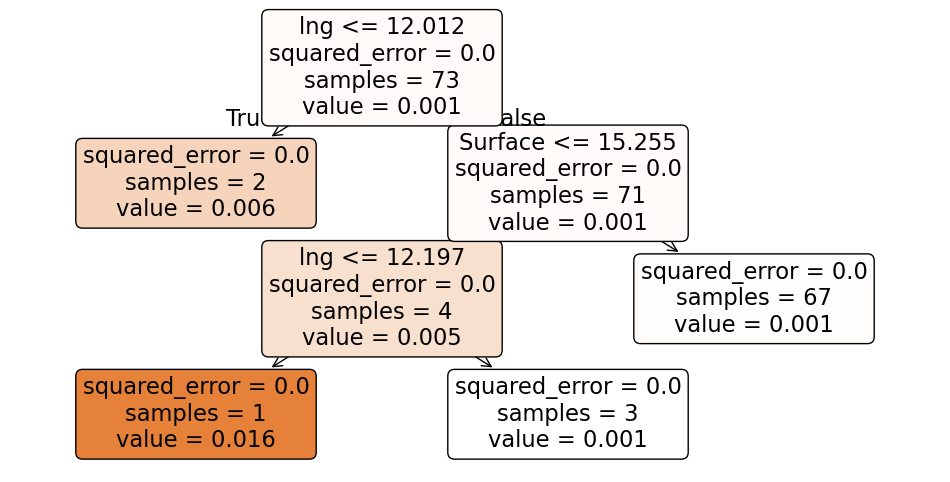

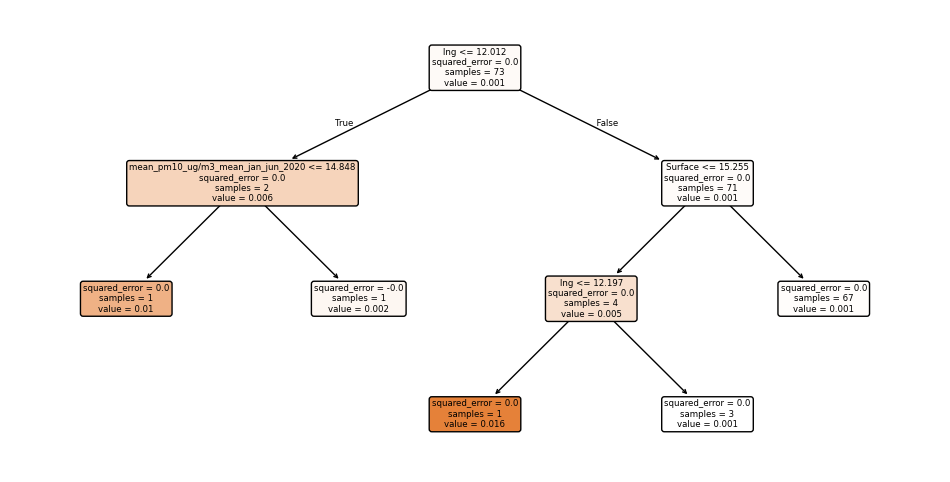

Performance per l'albero con 7 nodi: 
R²: -0.1492
RMSE: 0.0060
MAE: 0.0026
Performance per l'albero con 9 nodi: 
R²: -0.1344
RMSE: 0.0060
MAE: 0.0025


In [46]:
def train_tree_with_n_nodes(target_nodes, x_train, y_train, ccp_alphas):
    
    # Crea un albero decisionale con esattamente `target_nodes` nodi.
    # Restituisce l'albero addestrato e il valore di alpha utilizzato.
    
    # Ordina gli alpha in ordine decrescente per trovare più rapidamente l'albero desiderato
    sorted_ccp_alphas = sorted(ccp_alphas, reverse=True)

    # Inizializza l'alpha più alto per partire con un albero molto potato
    best_alpha = sorted_ccp_alphas[0]  

    for alpha in sorted_ccp_alphas:
        pruned_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
        pruned_tree.fit(x_train, y_train)

         # Se l'albero ha esattamente il numero di nodi richiesto, ci fermiamo
        if pruned_tree.tree_.node_count == target_nodes:
            best_alpha = alpha  # Memorizza l'alpha che dà il numero di nodi desiderato
            print(f"Trovato alpha per {target_nodes} nodi: {best_alpha}")
            break

    # Creazione del modello finale con l'alpha trovato
    final_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
    final_tree.fit(x_train, y_train)

    return final_tree, best_alpha

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Calcola R², RMSE e MAE per il modello
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae = mean_absolute_error(y_test, y_test_pred)

    print(f"R²: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
# Non restituisce nulla poiché stampa i risultati autonomamente
    

# Trova gli alberi con numero di nodi desiderato (7,9) nel nostro caso
tree_7, alpha_7 = train_tree_with_n_nodes(7, x_train, y_train, ccp_alphas)
tree_9, alpha_9 = train_tree_with_n_nodes(9, x_train, y_train, ccp_alphas)

plt.figure(figsize=(12, 6))
plt.title(f"Albero con 7 nodi (alpha={alpha_7:.5f})")
plot_tree(tree_7, filled=True, feature_names=x_train.columns, rounded=True)
plt.show()

plt.figure(figsize=(12, 6))
plt.title(f"Albero con 9 nodi (alpha={alpha_9:.5f})")
plot_tree(tree_9, filled=True, feature_names=x_train.columns, rounded=True)
plt.show()

# Valutazione delle performance
print("Performance per l'albero con 7 nodi: ")
evaluate_model(tree_7, x_train, y_train, x_test, y_test)

print("Performance per l'albero con 9 nodi: ")
evaluate_model(tree_9, x_train, y_train, x_test, y_test)


Grazie ai risultati delle metriche di valutazione è possibile affermare che i due alberi semplificati con il metodo CCP non differiscono di molto in accuratezza. 

Si sceglie a questo punto, data la scarsa abilità predittiva, su una base di leggibilità; che porta al modello definitivo descritto da un albero (costruito con metodo CCP) a 7 nodi.

Grazie a questo studio l'albero è stato diminuito di complessità, ora risulta leggibile.
Vediamo che le features più discriminanti risultano:
- Longitudine;
- Superficie.

Ciò fa supporre che i dati di inquinamento da polveri sottili potrebbero non essere influenti sul numero di casi covid normalizzato sulla popolazione. Sicuramente non nel caso di un singolo albero decisionale.

Ricordiamo i valori precedentemente trovati:
- R²:  -0.2556
- RMSE:  0.0063
- MAE: 0.0030

Il tree model addestrato con i dati di training e successivamente semplificato con il metodo CCP mostra effettivamente risultati migliori, sebbene di poco.

In effetti, il miglioramento dato dall'ultima analisi risulta quasi irrilevante.

Non è possibile sapere con certezza se effettivamente ci possa essere una connessione tra i dati di inquinamento/geografici e quelli epidemiologici. Ciò che emerge, per concludere, è che né un modello basato su regressione lineare né un tree-based model con CCP riescono nell'intento di costruire un modello di regressione soddisfacente. 

### Considerazioni sugli outliers:

Come ultimo compito, è stato ritenuto utile approfondire l'analisi dei dati outliers: Giove e Porano.

Diversi indizi hanno sollevato dubbi sulla presenza di anomalie in questi comuni: il numero di casi Covid per mille abitanti risulta estremamente alto, soprattutto considerando la limitata attività sociale che tali località avrebbero dovuto avere durante il lockdown.

L'indagine confronta il numero massimo di terapie intensive, i decessi e i casi Covid, con l'obiettivo di verificare se, come ipotizzato, esista una connessione tra questi fattori. L'analisi si è proposta di indagare se i dati suggeriscano che i focolai di infezione abbiano avuto origine all'interno di strutture per anziani, come case di riposo\RSA. In caso positivo i dati si differenzieranno discostandosi significativamente dai valori osservati negli altri comuni.


In [47]:
scatter_3d_plot_1 = build_3d_scatter_plot(
    df=cvdata_cleaned, 
    x_col='CovidCases_jan_jun_2020',  
    y_col='Deceased_jan_jun_2020',  
    z_col='MaxIntensiveCare_jan_jun_2020', 
    cluster_col='Zone',  
    hover_col='City',  
    title='3D Scatter Plot Outliers'
)
scatter_3d_plot_1()

I dati, come previsto, si distaccano marcatamente dal comportamento degli altri.
Questo rafforza l'ipotesi introdotta.